In [31]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import re
import seaborn as sns; sns.set()
import chart_studio.plotly as py
import cufflinks as cf
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
cf.go_offline()

import matplotlib.font_manager as fm
path = 'C:\Windows\Fonts\malgunbd.ttf'
font_name = fm.FontProperties(fname=path).get_name()
plt.rc('font', family=font_name)

In [32]:
Data = pd.read_csv('data/app_store.csv',encoding= 'UTF-8')

##### 데이터 정제 작업단계

In [33]:
Data.shape

(10841, 13)

In [34]:
Data.columns = ["app이름","카테고리","평가점수","리뷰수","app크기","다운로드수","유료구분","가격","이용가능연령구분","장르","마지막업데이트","버전","안드로이드버전"]

In [35]:
Data.장르[:50]

0                        Art & Design
1           Art & Design;Pretend Play
2                        Art & Design
3                        Art & Design
4             Art & Design;Creativity
5                        Art & Design
6                        Art & Design
7                        Art & Design
8                        Art & Design
9             Art & Design;Creativity
10                       Art & Design
11                       Art & Design
12                       Art & Design
13                       Art & Design
14                       Art & Design
15                       Art & Design
16                       Art & Design
17                       Art & Design
18                       Art & Design
19                       Art & Design
20                       Art & Design
21                       Art & Design
22                       Art & Design
23    Art & Design;Action & Adventure
24                       Art & Design
25                       Art & Design
26          

In [36]:
 Art & Design;Creativity

NameError: name 'Art' is not defined

In [37]:
Data.이용가능연령구분.value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: 이용가능연령구분, dtype: int64

In [38]:
Data[Data.리뷰수 == '3.0M']

,app이름,카테고리,평가점수,리뷰수,app크기,다운로드수,유료구분,가격,이용가능연령구분,장르,마지막업데이트,버전,안드로이드버전
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [39]:
data_test = Data.iloc[10472,:].values[1:]

In [40]:
data_test[0] = 1.9

In [41]:
data_test = data_test[:-1]

In [42]:
match = []
list_index = []

In [43]:
temp_data = Data.app이름.values
for i in temp_data:
    match.append(re.search(r'[Pp]hoto',i))

In [44]:
# Photo가 들어있는 카테고리 index추출
for i in enumerate(match):
    if i[1] is None:
        pass
    else:
        list_index.append(i[0])

In [45]:
Temp_data2 = Data.iloc[list_index,:]

In [46]:
Temp_data2.카테고리.value_counts()

PHOTOGRAPHY            144
ART_AND_DESIGN          11
VIDEO_PLAYERS            6
TOOLS                    6
FAMILY                   5
PERSONALIZATION          4
BEAUTY                   4
SOCIAL                   3
HEALTH_AND_FITNESS       2
EVENTS                   2
BOOKS_AND_REFERENCE      1
SHOPPING                 1
DATING                   1
COMICS                   1
HOUSE_AND_HOME           1
PRODUCTIVITY             1
LIFESTYLE                1
1.9                      1
PARENTING                1
Name: 카테고리, dtype: int64

In [47]:
AA = Temp_data2.카테고리.value_counts()

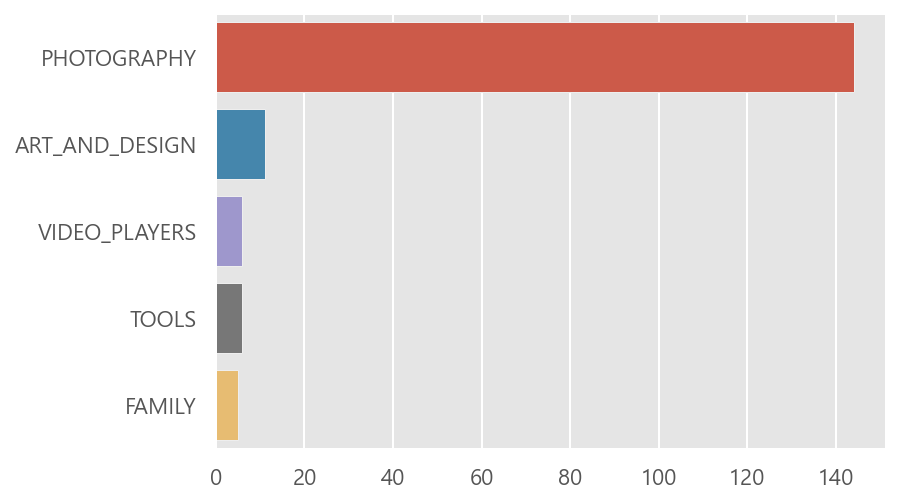

In [48]:
sns.barplot(x = AA[:5].values,y = AA[:5].index)

In [49]:
Temp_data2.장르.value_counts()

Photography                144
Art & Design                11
Video Players & Editors      6
Tools                        6
Beauty                       4
Personalization              4
Entertainment                4
Social                       3
Health & Fitness             2
Events                       2
Lifestyle                    1
Shopping                     1
House & Home                 1
Parenting                    1
Puzzle                       1
February 11, 2018            1
Dating                       1
Books & Reference            1
Comics                       1
Productivity                 1
Name: 장르, dtype: int64

In [50]:
BB = Temp_data2.장르.value_counts()

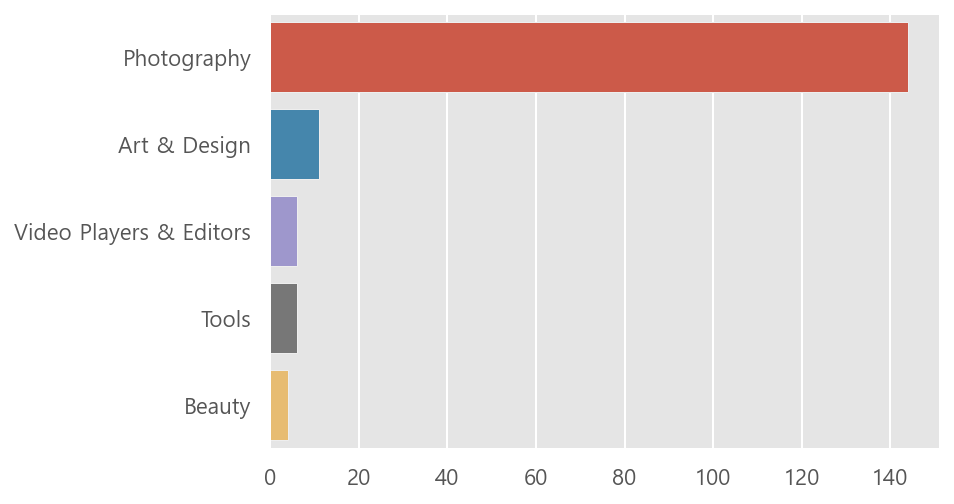

In [51]:
sns.barplot(x = BB[:5].values, y = BB[:5].index)

##### 검증결과
- 장르는 Photography, 카테코리도 PHOTOGRAPHY로 결정
- 왜냐하면 유사한 App이름을 가진 장르, 카테고리 중 Top1차지한 이름을 가지고 왔기 떄문

In [52]:
def Modify(data):
    data.iloc[10472,2:] = data_test
    data.iloc[10472,1] = "PHOTOGRAPHY"
    data.iloc[10472,-4] = "Photography"
    return data

In [53]:
# 수정된 것 갱신
Data = Modify(Data)

In [54]:
Modify(Data).iloc[10472,:] # 확인 완료

app이름       Life Made WI-Fi Touchscreen Photo Frame
카테고리                                    PHOTOGRAPHY
평가점수                                            1.9
리뷰수                                              19
app크기                                          3.0M
다운로드수                                        1,000+
유료구분                                           Free
가격                                                0
이용가능연령구분                                   Everyone
장르                                      Photography
마지막업데이트                           February 11, 2018
버전                                           1.0.19
안드로이드버전                                  4.0 and up
Name: 10472, dtype: object

##### 분석 단계
1. 우선 Rating없는 것은 test data로 활용할 것임 
    - 따라서 나머지 9367개 데이터로 Rating과의 관계를 분석할 것

In [75]:
Data.head()

,app이름,카테고리,평가점수,리뷰수,app크기,다운로드수,유료구분,가격,이용가능연령구분,장르,마지막업데이트,버전,안드로이드버전
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


##### train, test데이터 분류

In [56]:
Data_index = list(Data.index)

In [57]:
test_index = []

In [58]:
Data_index

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [59]:
New_Data = Data.loc[Data.평가점수.notnull(),:]

In [60]:
for i in Data.index:
    if i in New_Data.index:
        Data_index.remove(i)
    else:
        test_index.append(i)

In [61]:
Test = Data.iloc[test_index,:]

In [62]:
with open('Test.pickle','wb') as f:
    pickle.dump(Test,f)

In [63]:
with open('New_Data.pickle','wb') as f:
    pickle.dump(New_Data,f)

In [64]:
New_Data.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            10828, 10829, 10830, 10832, 10833, 10834, 10836, 10837, 10839,
            10840],
           dtype='int64', length=9367)

In [65]:
New_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9367 entries, 0 to 10840
Data columns (total 13 columns):
app이름       9367 non-null object
카테고리        9367 non-null object
평가점수        9367 non-null float64
리뷰수         9367 non-null object
app크기       9367 non-null object
다운로드수       9367 non-null object
유료구분        9367 non-null object
가격          9367 non-null object
이용가능연령구분    9367 non-null object
장르          9367 non-null object
마지막업데이트     9367 non-null object
버전          9363 non-null object
안드로이드버전     9365 non-null object
dtypes: float64(1), object(12)
memory usage: 1.3+ MB


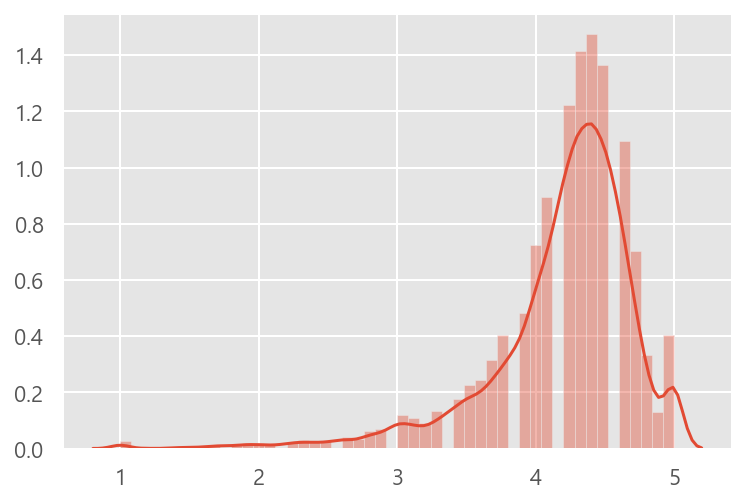

In [73]:
sns.distplot(New_Data[New_Data.이용가능연령구분 == 'Everyone'].평가점수.values)

## 2. 평가점수 분포 확인

In [28]:
Rating_data = New_Data.평가점수.values

Text(0.5, 0, '평가점수')

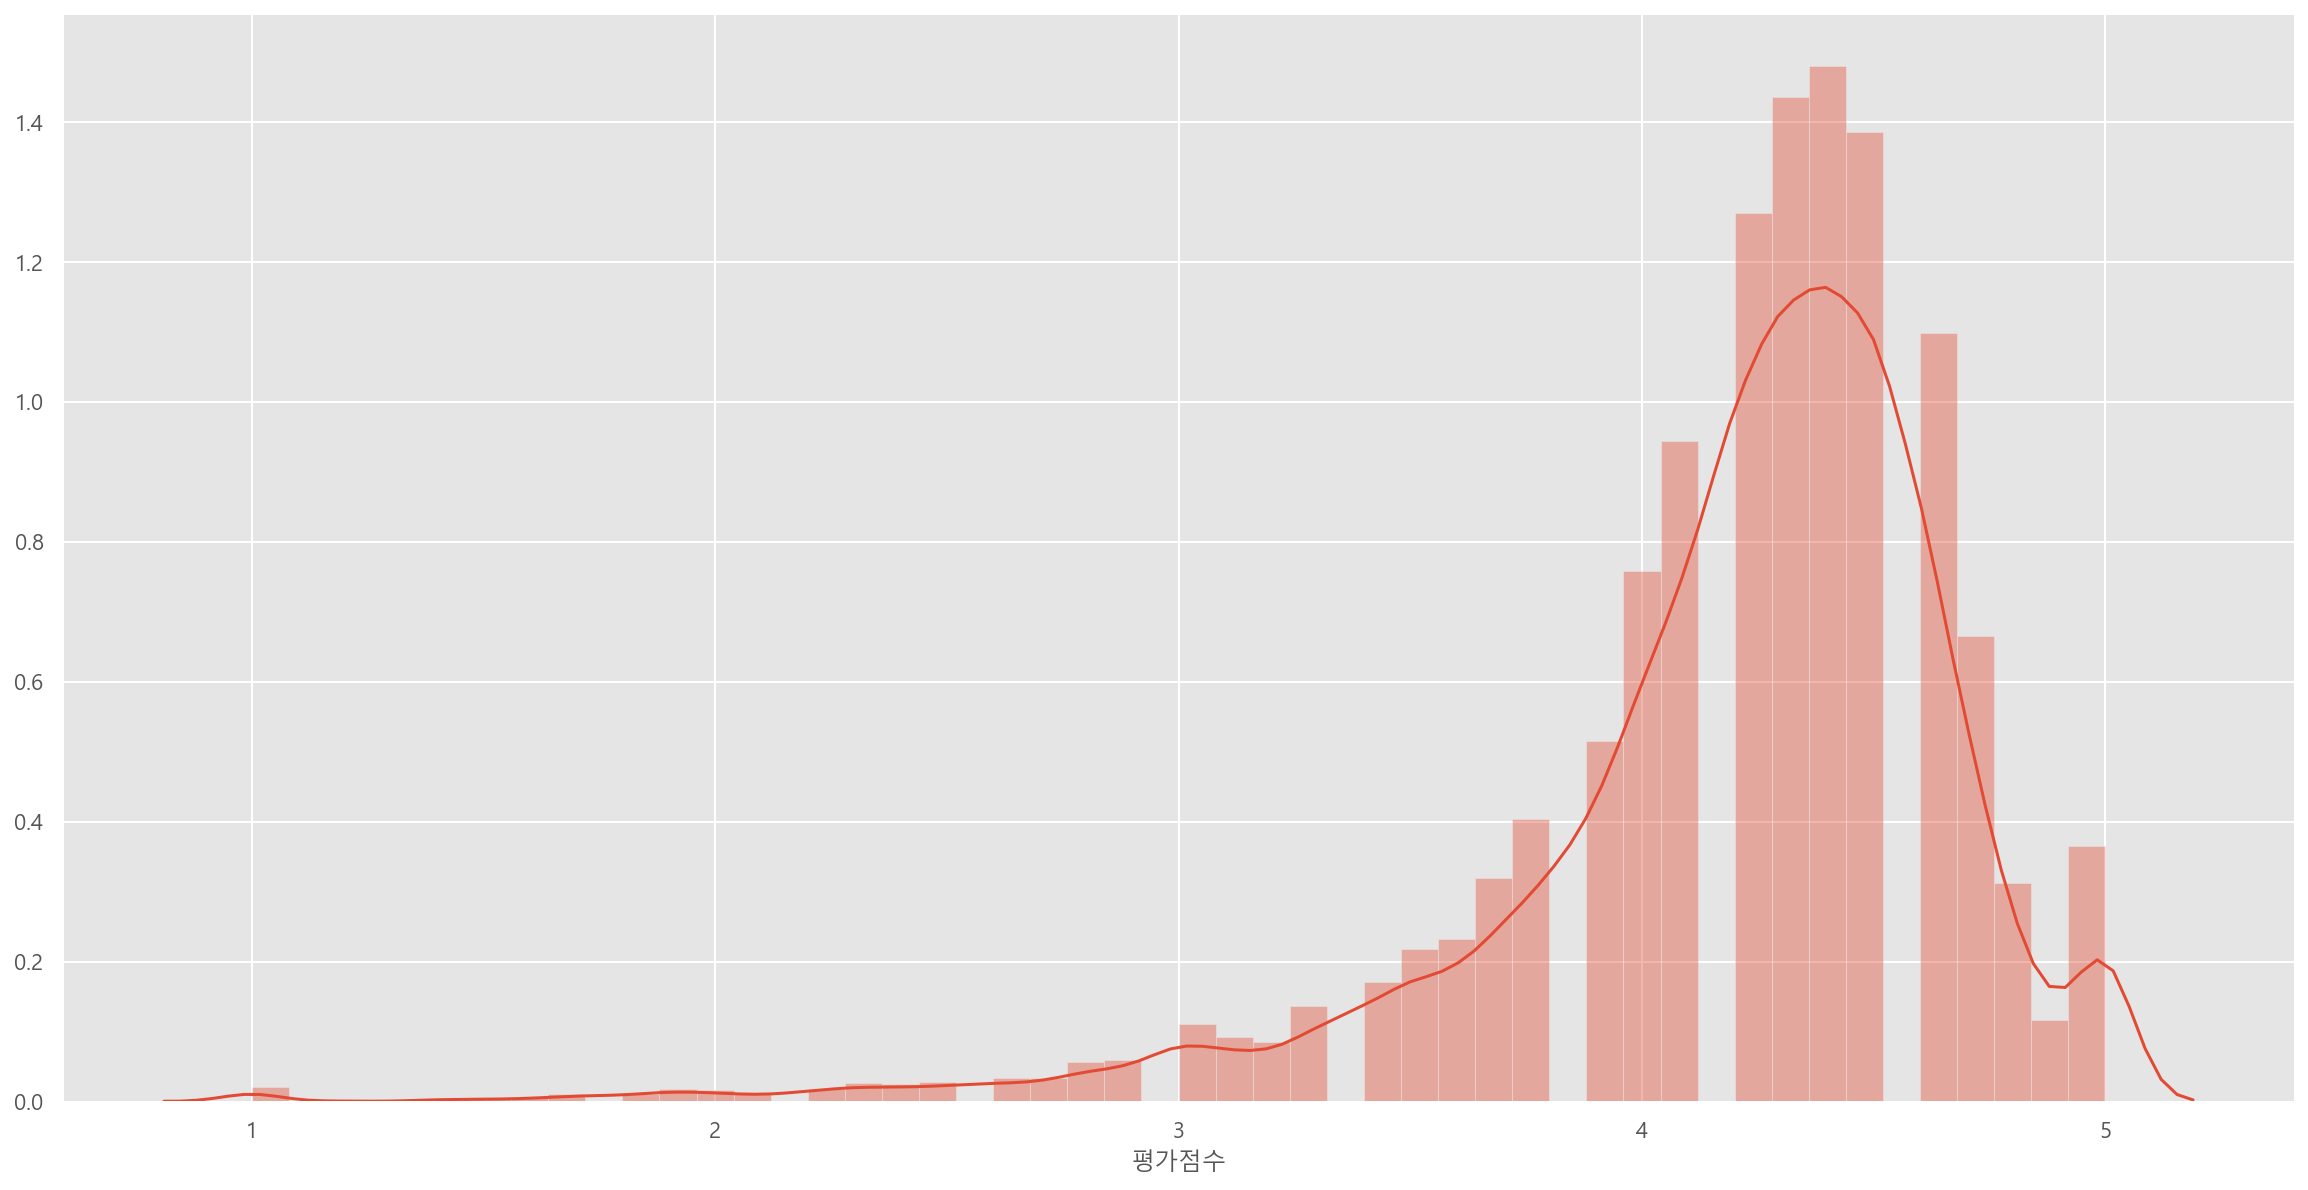

In [29]:
plt.figure(figsize = (20,10))
sns.distplot(Rating_data)
plt.xlabel('평가점수')

4~5점 사이에 분포

In [30]:
Rating_data.shape

(9367,)

## 3. 다운로드수와 평점 비교

In [31]:
Download_data = New_Data.다운로드수

In [32]:
def Adjust(data):
    data = data.apply(lambda x : x.replace(",",""))
    data = data.apply(lambda x : x.replace("+",""))
    data = data.apply(lambda x : x.replace("+",""))
    data = data.apply(lambda x : int(x))
    return data

In [33]:
x = Adjust(Download_data).values
y = Adjust(Download_data).value_counts().values

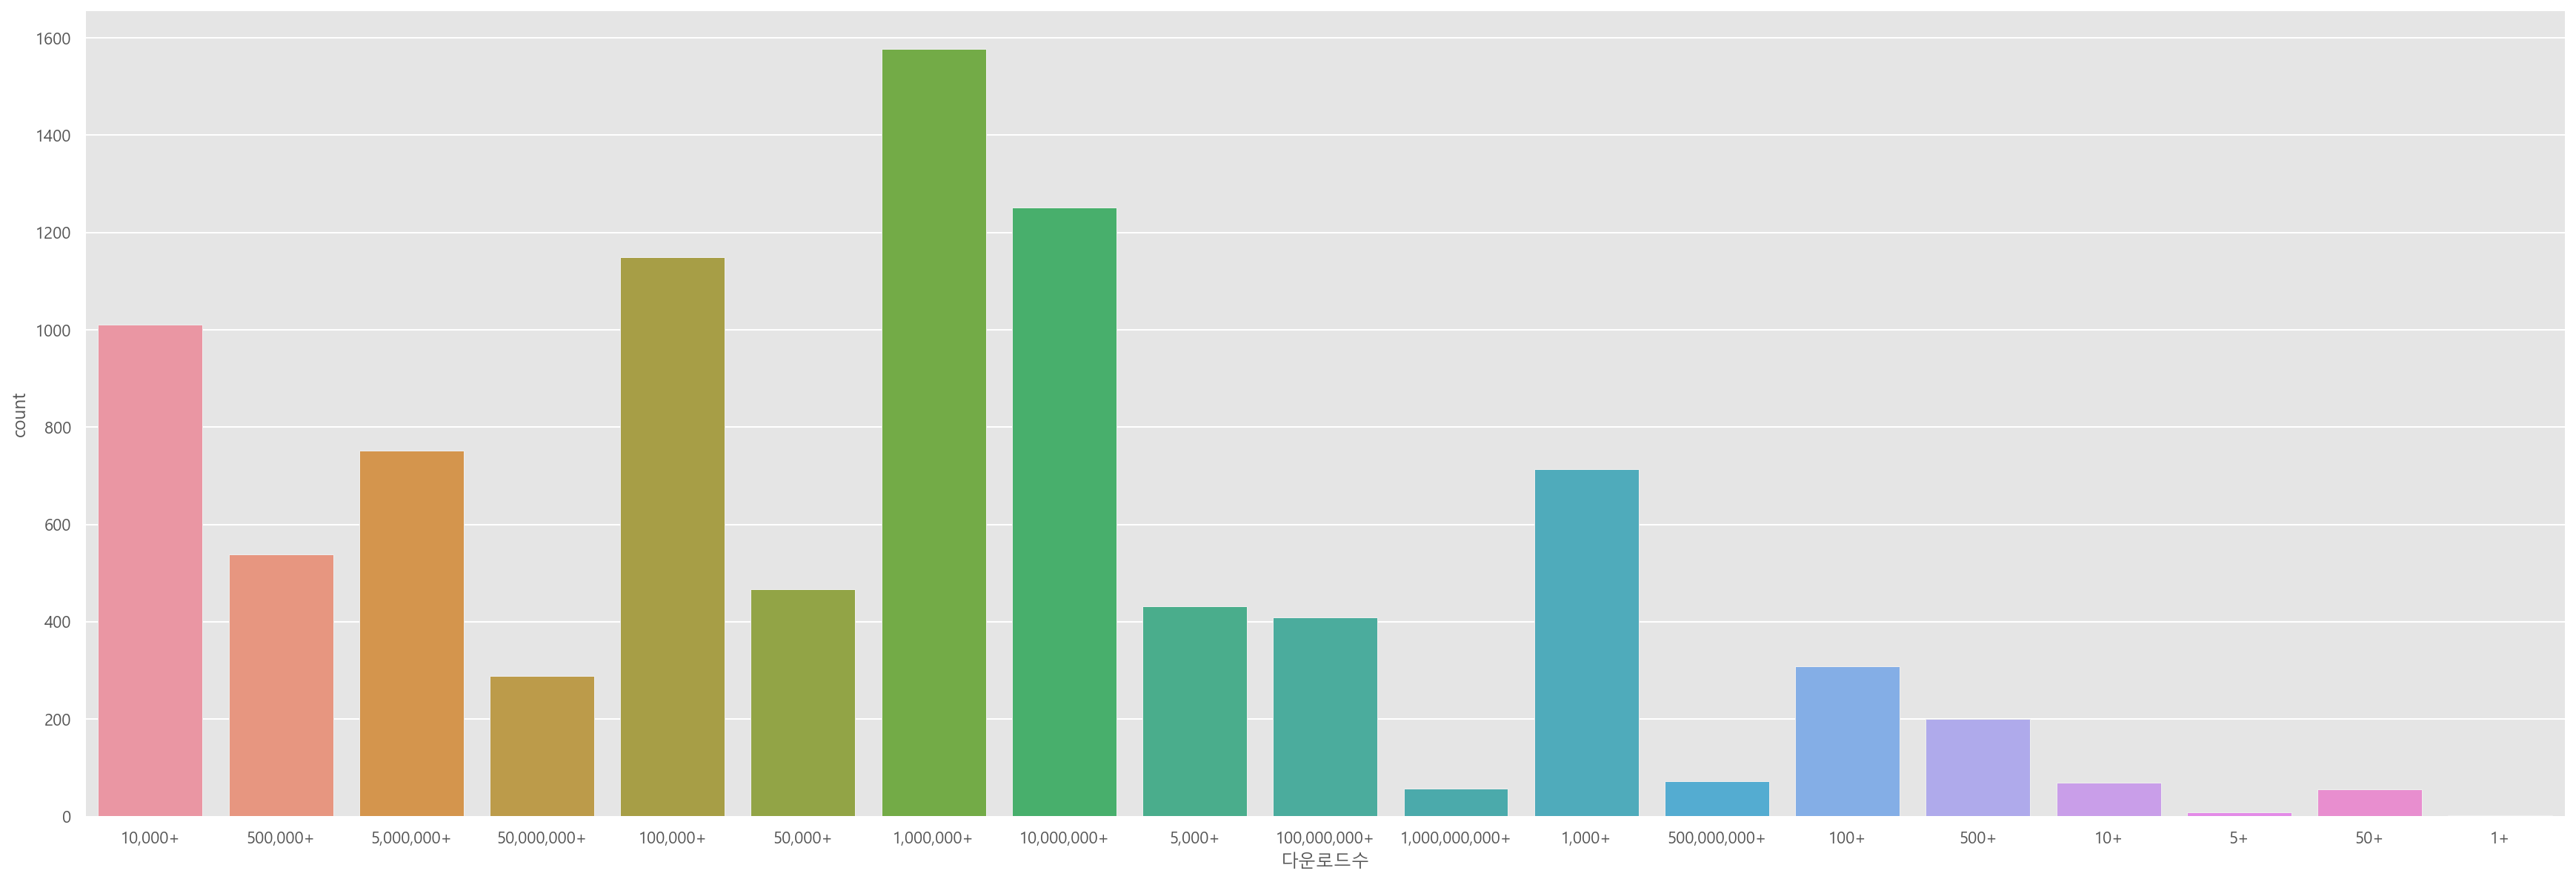

In [34]:
plt.figure(figsize = (30,10))
sns.countplot(x = Download_data,data = New_Data)

In [35]:
Download_data_adjust = Adjust(Download_data)

In [36]:
Download_data_adjust.unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,        100,        500,
               10,          5,         50,          1], dtype=int64)

In [37]:
value = np.sort(Download_data_adjust.unique())
# 개수  = 19개

In [38]:
value = list(value)
value
# 서열척도로 판단해보자.

[1,
 5,
 10,
 50,
 100,
 500,
 1000,
 5000,
 10000,
 50000,
 100000,
 500000,
 1000000,
 5000000,
 10000000,
 50000000,
 100000000,
 500000000,
 1000000000]

In [39]:
dict_value = {}

In [40]:
for i in enumerate(value):
    dict_value[i[1]] = i[0]+1

In [41]:
dict_value

{1: 1,
 5: 2,
 10: 3,
 50: 4,
 100: 5,
 500: 6,
 1000: 7,
 5000: 8,
 10000: 9,
 50000: 10,
 100000: 11,
 500000: 12,
 1000000: 13,
 5000000: 14,
 10000000: 15,
 50000000: 16,
 100000000: 17,
 500000000: 18,
 1000000000: 19}

In [42]:
dict_value[value[1]]

2

In [43]:
Download_data_adjust.value_counts()

1000000       1577
10000000      1252
100000        1150
10000         1010
5000000        752
1000           714
500000         538
50000          467
5000           432
100000000      409
100            309
50000000       289
500            201
500000000       72
10              69
1000000000      58
50              56
5                9
1                3
Name: 다운로드수, dtype: int64

In [44]:
New_Data['다운로드수'] = Adjust(New_Data['다운로드수'])

In [45]:
Down_data = New_Data['다운로드수'].apply(lambda x : dict_value[x])

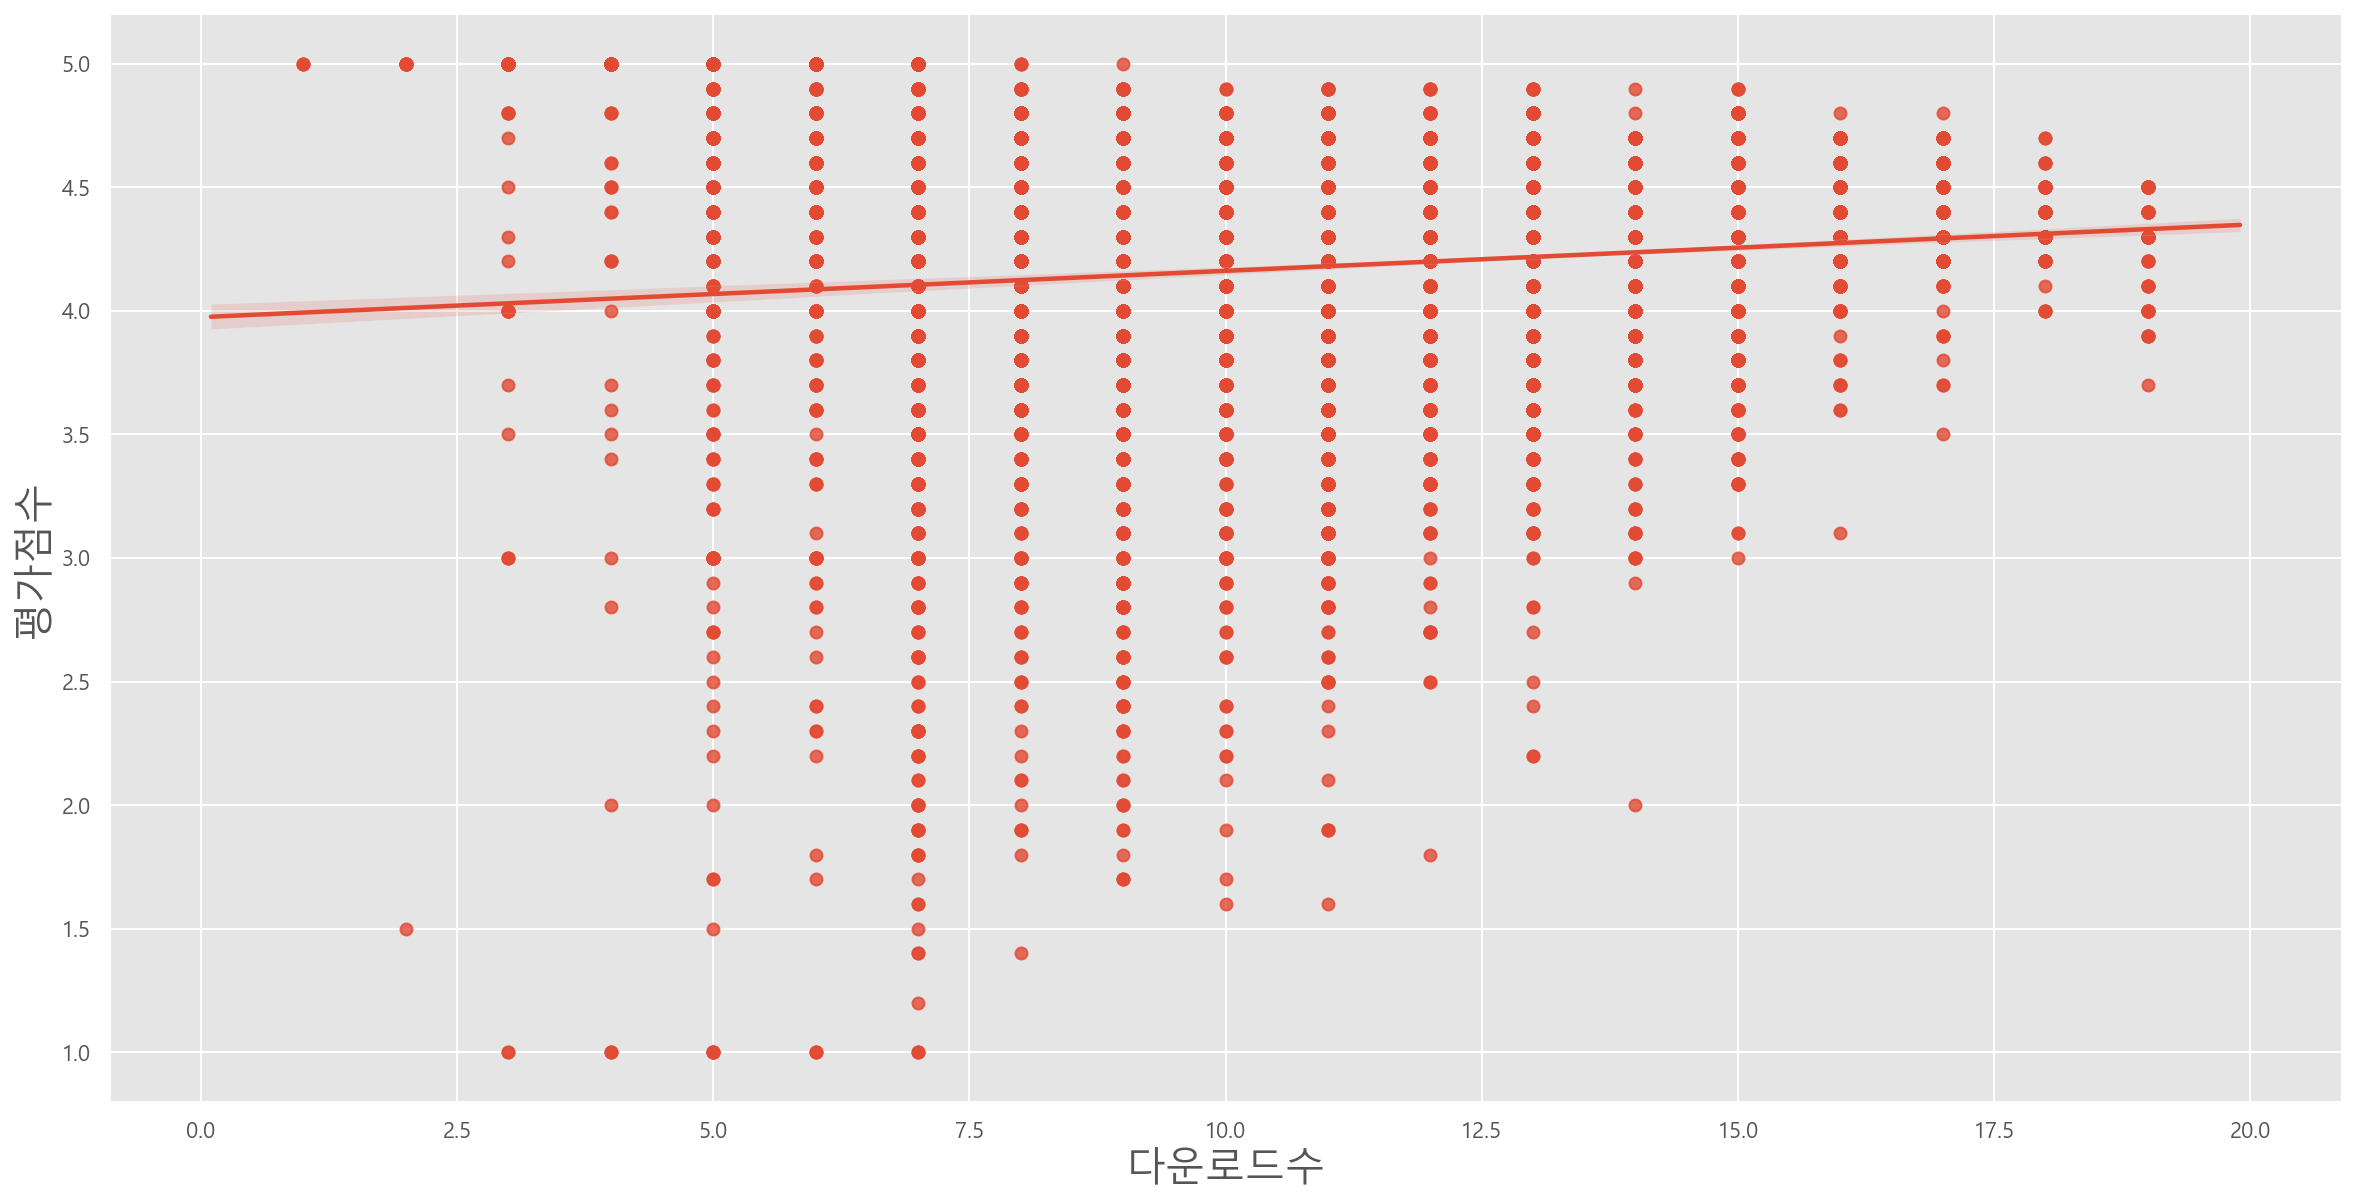

In [46]:
plt.figure(figsize = (20,10))
sns.regplot(x= Down_data,y = Rating_data)
plt.xlabel('다운로드수',fontsize = 20)
plt.ylabel('평가점수',fontsize = 20)
plt.show()

추세선을 보니 다운로드와 평점이 관련성이 있나...?

In [47]:
# Feature때문에 변환
# New_Data['다운로드수'] = Down_data

## 4. 다운로드수가 많은 어플은 무엇일까? + 카테고리와 비교
    - 카테고리는 총 33 종류가 있음.

In [48]:
len(New_Data.카테고리.value_counts().index)

33

In [49]:
New_Data[New_Data['카테고리'] == 'PRODUCTIVITY'].head()
# PRODCUTIVITY는 업무 보조용 프로그램 같음.. 예를 들어 마이크로소프트 워드, 구글드라이브를 보니까 사무보조용 프로그램인듯.

,app이름,카테고리,평가점수,리뷰수,app크기,다운로드수,유료구분,가격,이용가능연령구분,장르,마지막업데이트,버전,안드로이드버전
3450,Microsoft Word,PRODUCTIVITY,4.5,2084126,Varies with device,500000000,Free,0,Everyone,Productivity,"July 11, 2018",16.0.10325.20043,4.4 and up
3451,"All-In-One Toolbox: Cleaner, Booster, App Manager",PRODUCTIVITY,4.7,536926,Varies with device,10000000,Free,0,Everyone,Productivity,"August 5, 2018",Varies with device,Varies with device
3452,Adobe Acrobat Reader,PRODUCTIVITY,4.3,3016297,Varies with device,100000000,Free,0,Everyone,Productivity,"April 17, 2018",Varies with device,Varies with device
3453,"AVG Cleaner – Speed, Battery & Memory Booster",PRODUCTIVITY,4.4,1188154,24M,10000000,Free,0,Everyone,Productivity,"June 14, 2018",4.6.4,4.1 and up
3454,Google Drive,PRODUCTIVITY,4.4,2731171,Varies with device,1000000000,Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device


In [50]:
Cat_Data = New_Data[['카테고리','다운로드수']].groupby('카테고리').sum().sort_values(by = '다운로드수',ascending = False)
# 이로써 GAME, COMMUICATION어플이 가장 많이 다운로드 됨. 대략 350억,326억 다운로드 수 기록

In [51]:
Cat_Data

,다운로드수
카테고리,
GAME,35085862717
COMMUNICATION,32647241530
PRODUCTIVITY,14176070180
SOCIAL,14069841475
TOOLS,11450724500
FAMILY,10257701590
PHOTOGRAPHY,10088244130
NEWS_AND_MAGAZINES,7496210650
TRAVEL_AND_LOCAL,6868859300


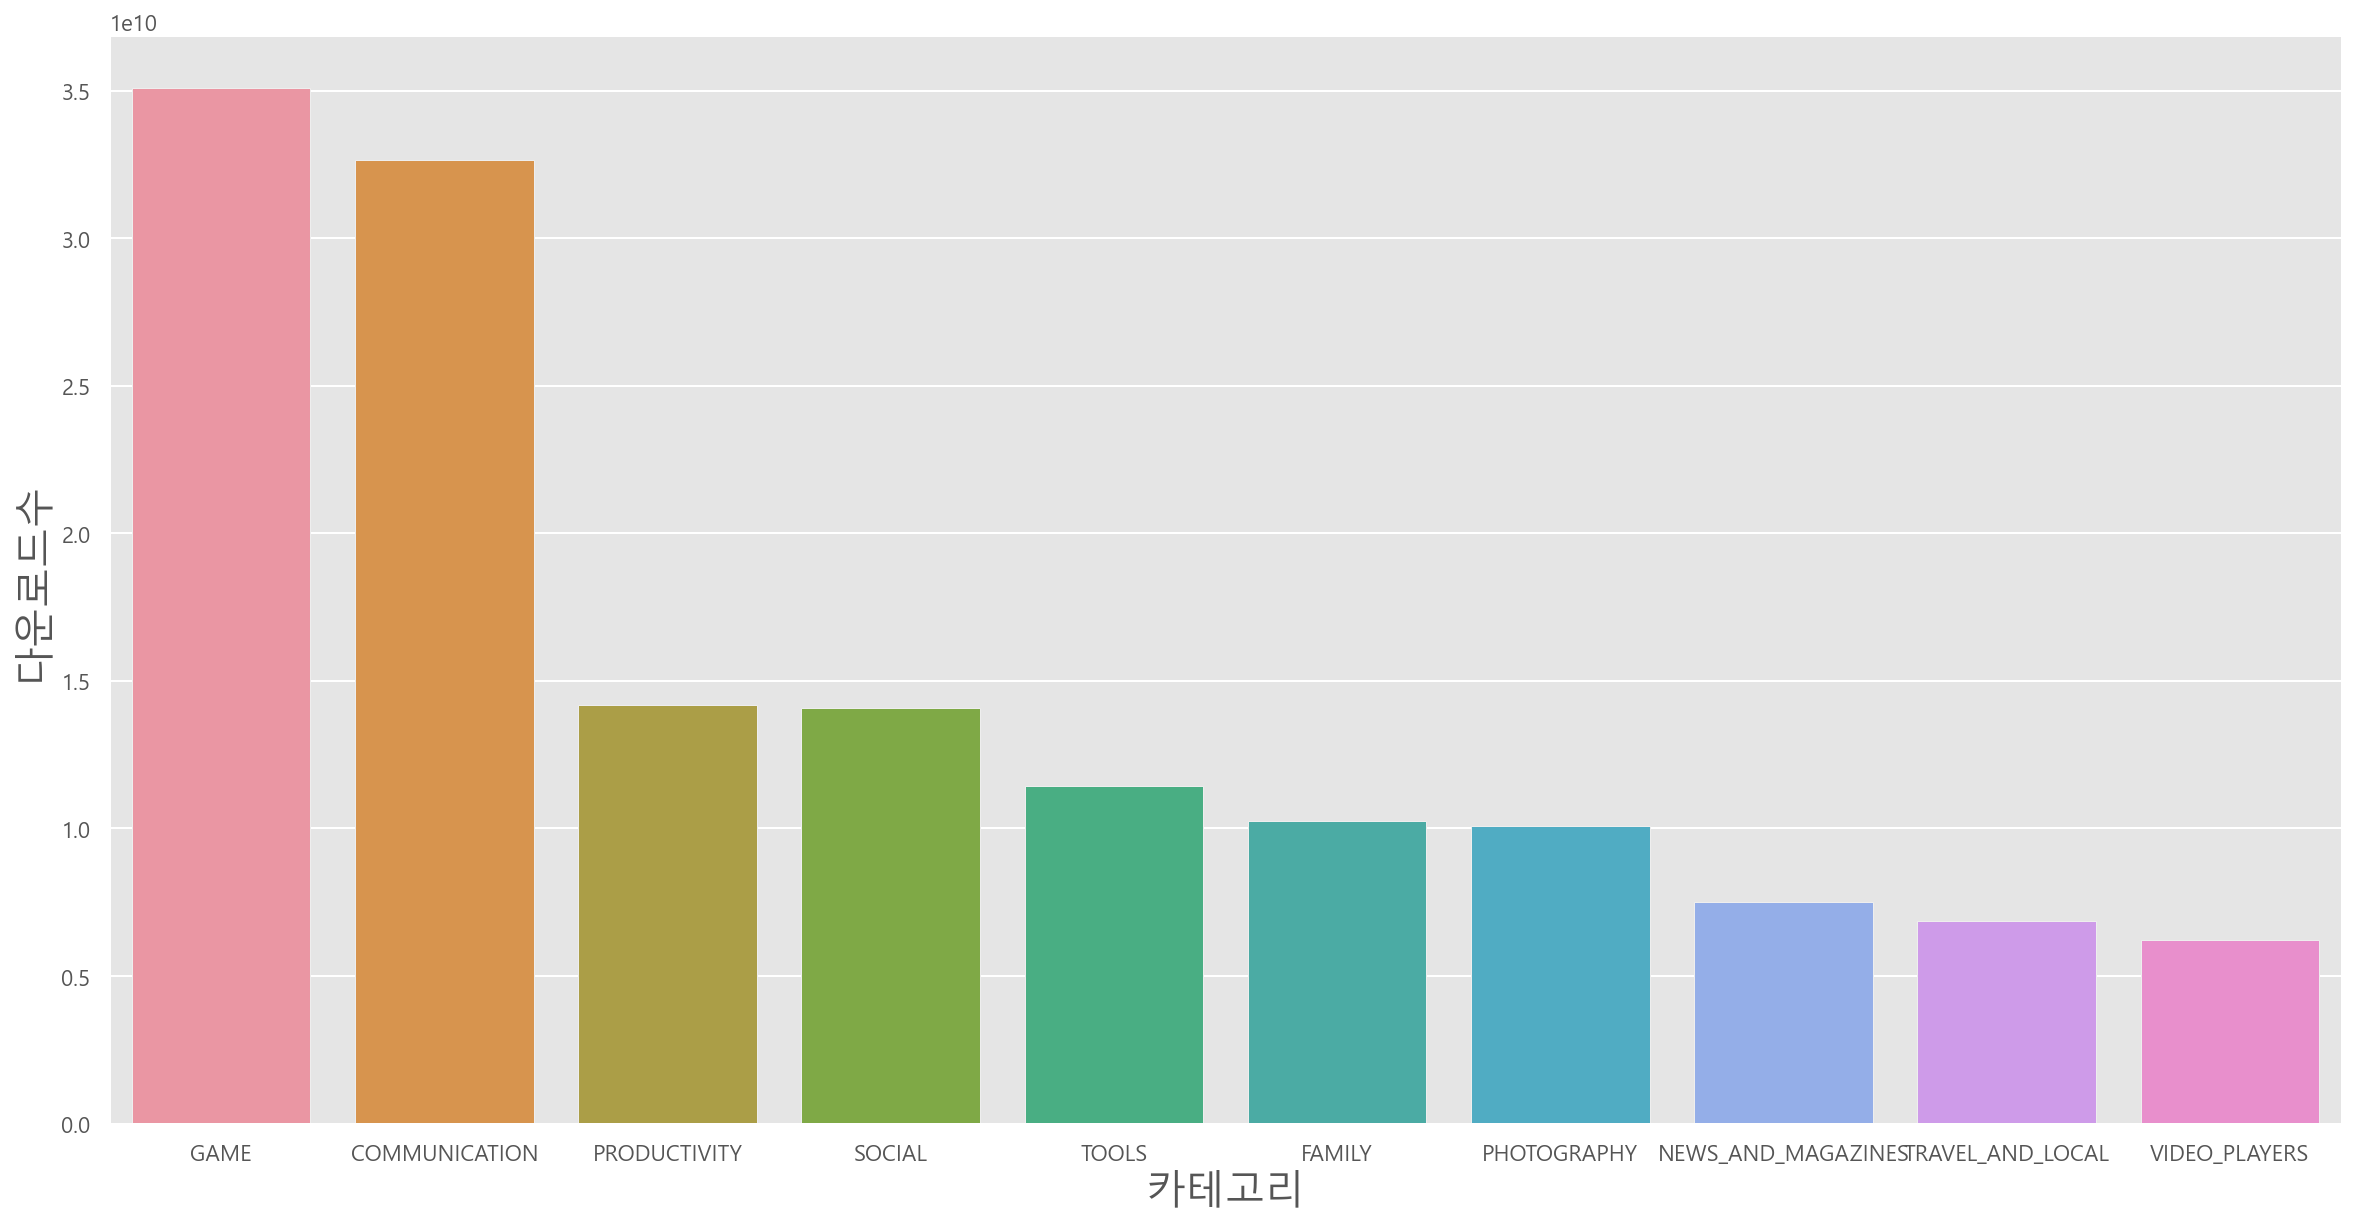

In [52]:
plt.figure(figsize = (20,10))
sns.barplot(x = Cat_Data[:10].index, y = Cat_Data.다운로드수[:10])
plt.xlabel('카테고리',fontsize = 20)
plt.ylabel('다운로드수',fontsize = 20)
plt.show()

## 5. 리뷰수 vs 평가점수
- 과연 관계가 있을 까?

In [53]:
New_Data.리뷰수 = New_Data.리뷰수.apply(lambda x : int(x))

In [54]:
# 상관계수가 거의 없네... 
# 다만 다운로드가 많을 수록 리뷰가 많다고 하는 주장은 어느 정도 일리가 있음..
New_Data.corr()

,평가점수,리뷰수,다운로드수
평가점수,1.000000,0.068147,0.051393
리뷰수,0.068147,1.000000,0.641613
다운로드수,0.051393,0.641613,1.000000


- 리뷰수가 많은 카테고리는 무엇일까?

In [55]:
New_Data.리뷰수.mean()

513994.959752322

In [56]:
New_Data[New_Data.리뷰수 >= New_Data.리뷰수.mean()].sort_values(by = '리뷰수',ascending = False)

,app이름,카테고리,평가점수,리뷰수,app크기,다운로드수,유료구분,가격,이용가능연령구분,장르,마지막업데이트,버전,안드로이드버전
2544,Facebook,SOCIAL,4.1,78158306,Varies with device,1000000000,Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
3943,Facebook,SOCIAL,4.1,78128208,Varies with device,1000000000,Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,Varies with device,1000000000,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7077,Zoosk Dating App: Meet Singles,DATING,4.0,516917,Varies with device,10000000,Free,0,Mature 17+,Dating,"August 2, 2018",Varies with device,Varies with device
482,Zoosk Dating App: Meet Singles,DATING,4.0,516801,Varies with device,10000000,Free,0,Mature 17+,Dating,"August 2, 2018",Varies with device,Varies with device
1933,Alto's Adventure,GAME,4.6,515657,63M,10000000,Free,0,Everyone,Action,"June 5, 2018",1.7.1,4.0 and up
3936,Alto's Adventure,GAME,4.6,515240,63M,10000000,Free,0,Everyone,Action,"June 5, 2018",1.7.1,4.0 and up


In [57]:
Rev = New_Data[['리뷰수','카테고리']].groupby('카테고리').sum().sort_values(by = '리뷰수',ascending = False)

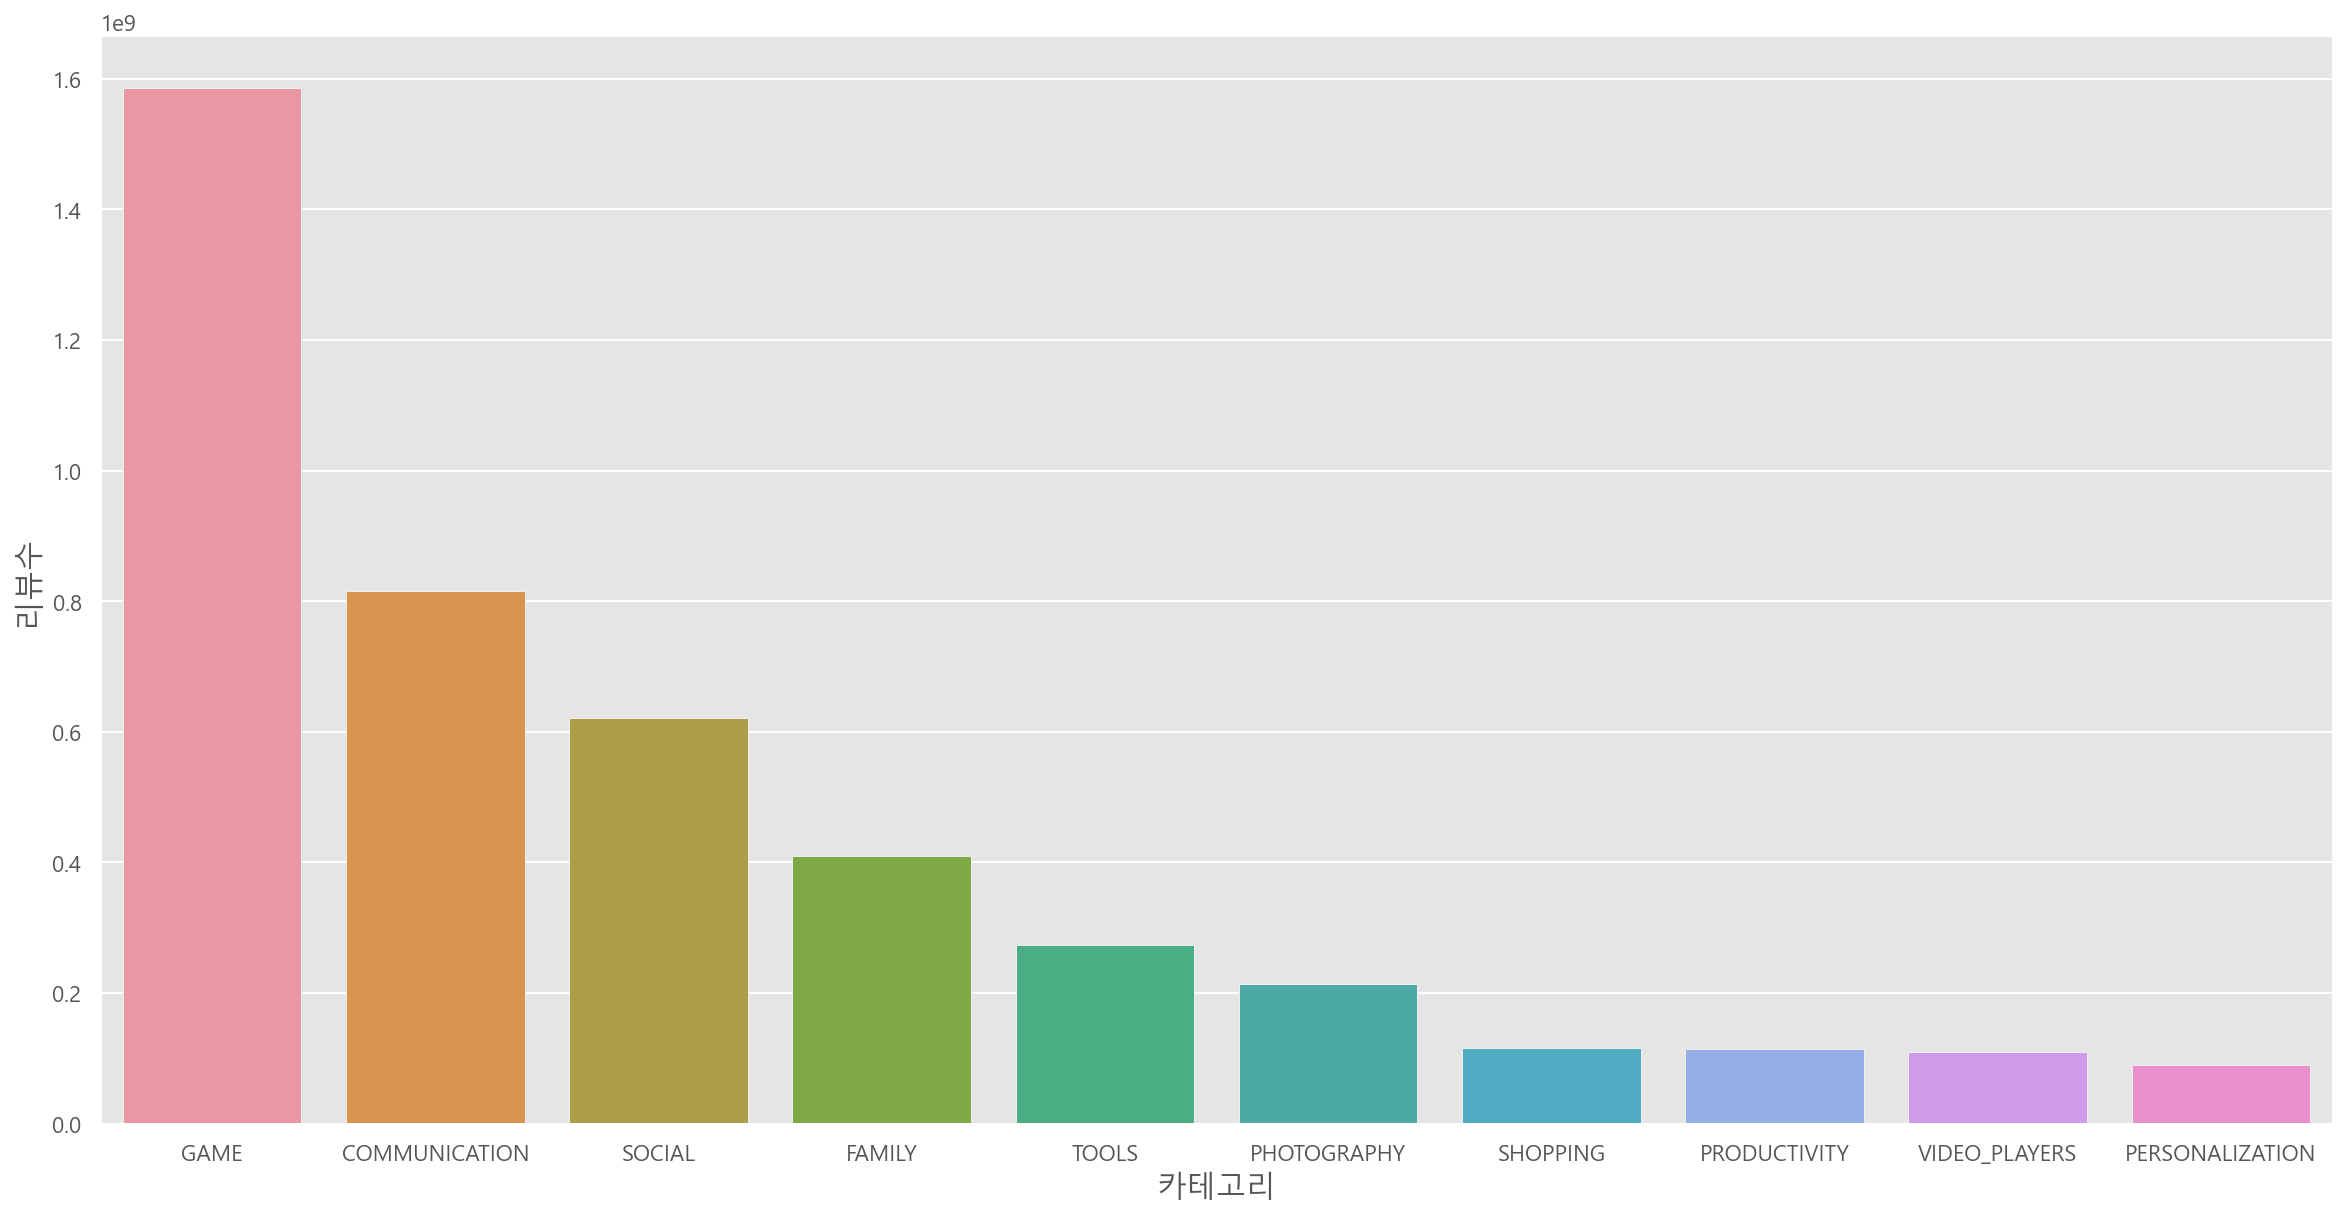

In [58]:
plt.figure(figsize = (20,10))
sns.barplot(Rev.index[:10], Rev.리뷰수[:10],data = Rev)
plt.xlabel('카테고리',fontsize = 15)
plt.ylabel('리뷰수',fontsize = 15)
plt.show()

## 6. 어떤 카테고리가 평점이 높을까?
- 카테고리 vs 평점

In [59]:
data_cat = New_Data[['카테고리','평가점수']].groupby('카테고리').mean()

In [60]:
data_cat
# 평가점수의 평균을 구해보려고 했는데 전부다 4점대이므로 의미 없음.

,평가점수
카테고리,
ART_AND_DESIGN,4.358065
AUTO_AND_VEHICLES,4.190411
BEAUTY,4.278571
BOOKS_AND_REFERENCE,4.346067
BUSINESS,4.121452
COMICS,4.155172
COMMUNICATION,4.158537
DATING,3.970769
EDUCATION,4.389032


In [61]:
data_cat.describe()

,평가점수
count,33.000000
mean,4.201926
std,0.105635
min,3.970769
25%,4.131889
50%,4.190411
75%,4.277104
max,4.435556


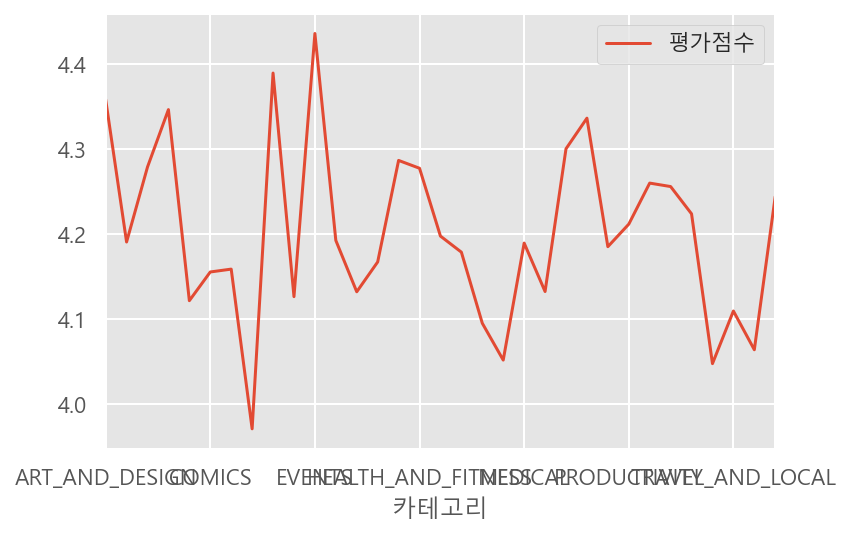

In [62]:
data_cat.plot()

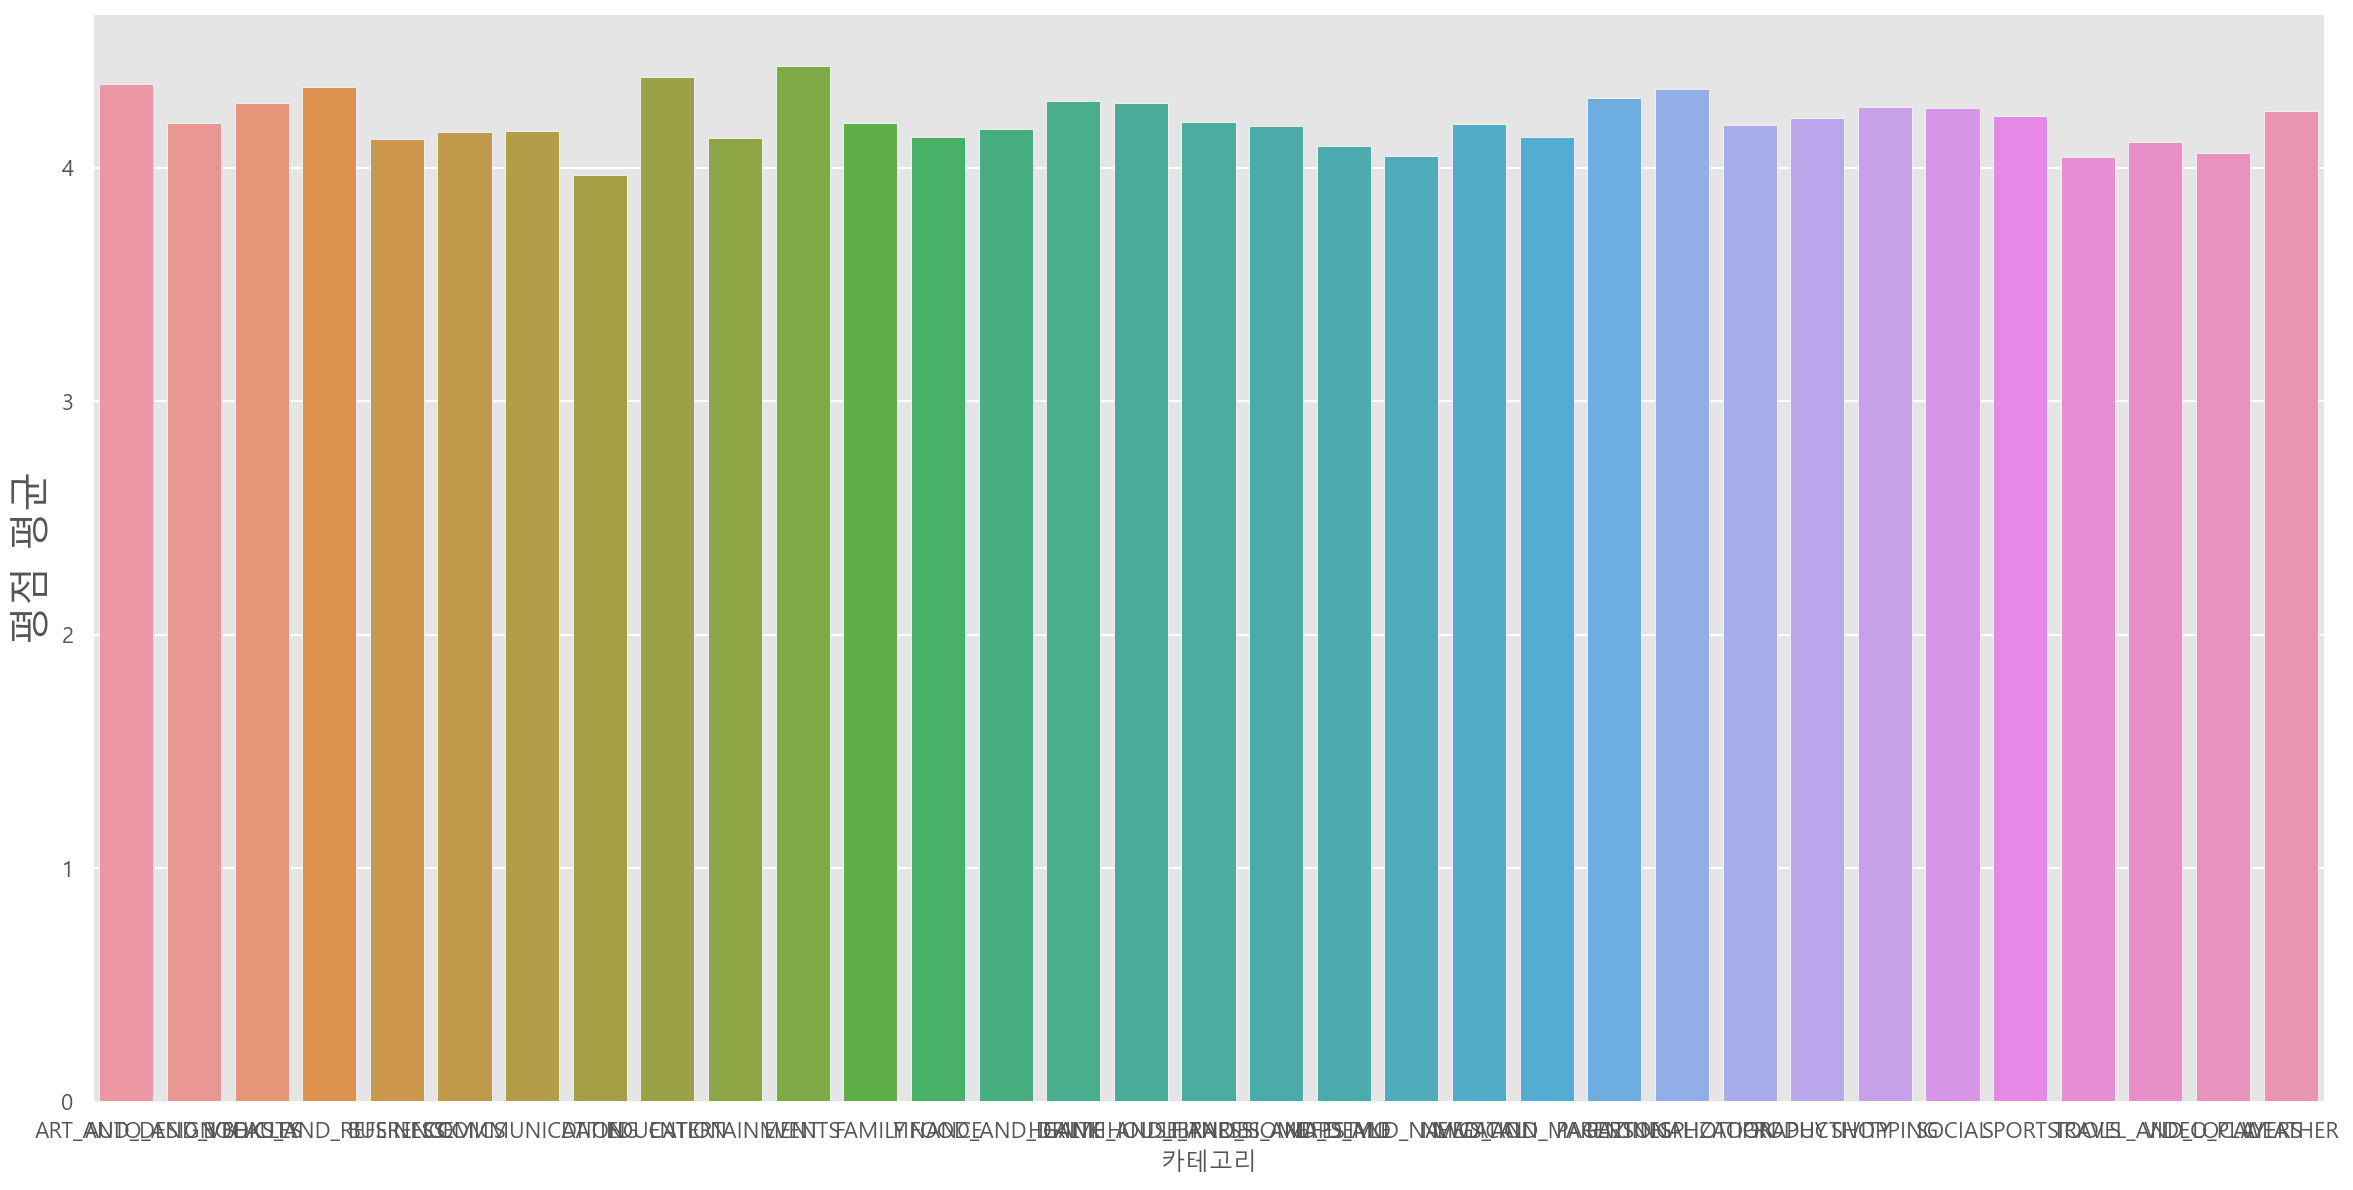

In [63]:
plt.figure(figsize = (20,10))
sns.barplot(data_cat.index,data_cat.평가점수,data = data_cat)
plt.ylabel('평점 평균',fontsize = 20)
plt.show()

## 어떤 장르가 평점이 높을까?
- 카테고리는 별 의미 없다... 그렇다면 장르는??

In [64]:
data_gnr = New_Data[['장르','평가점수']].groupby('장르').mean()

In [65]:
data_gnr.describe()

,평가점수
count,115.000000
mean,4.259303
std,0.182208
min,3.800000
25%,4.151179
50%,4.266667
75%,4.354464
max,4.800000


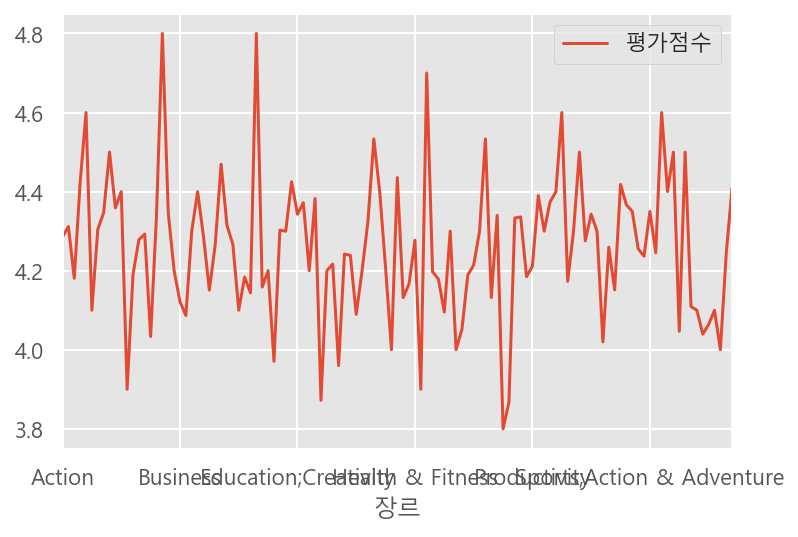

In [66]:
data_gnr.plot()

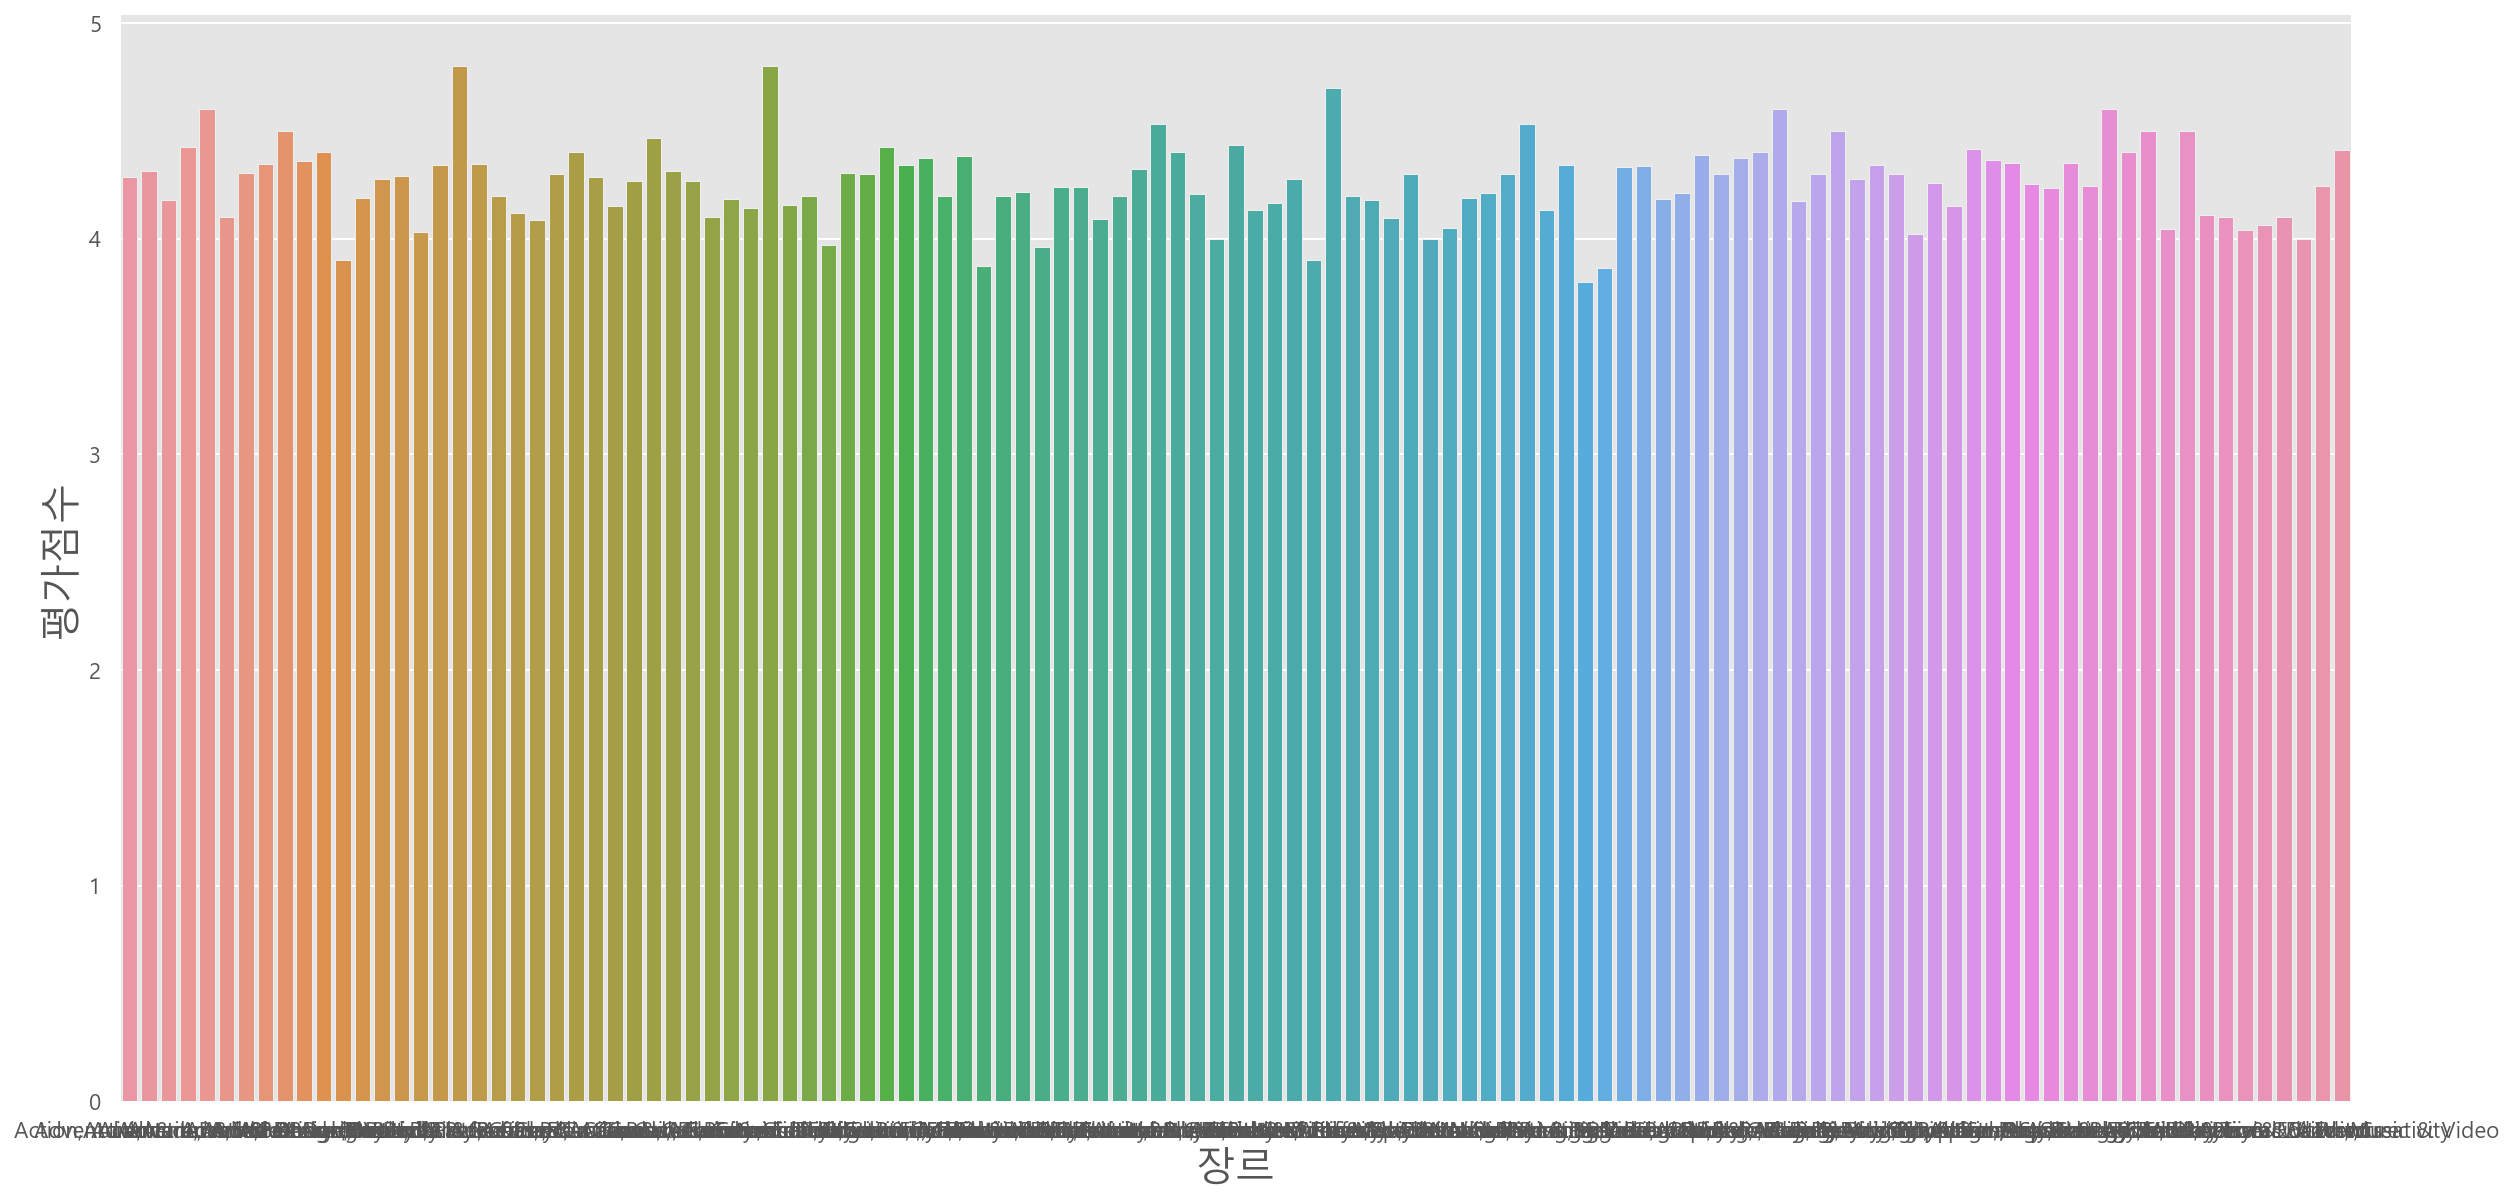

In [67]:
plt.figure(figsize = (20,10))
sns.barplot(data_gnr.index,data_gnr.평가점수,data = data_gnr)
plt.xlabel('장르',fontsize = 20)
plt.ylabel('평가점수',fontsize = 20)
plt.show()

In [68]:
data_gnr.sort_values(by = '평가점수',ascending = False)[:10]

,평가점수
장르,
Comics;Creativity,4.800000
Board;Pretend Play,4.800000
Health & Fitness;Education,4.700000
Adventure;Brain Games,4.600000
Strategy;Action & Adventure,4.600000
Puzzle;Education,4.600000
Entertainment;Creativity,4.533333
Music;Music & Video,4.533333
Arcade;Pretend Play,4.500000


별 차이 없다......

## 7. 앱 크기와 평가점수와의 관계는 어떻게??

Kilo byte 기준으로 정리해보자

In [69]:
test_copy = New_Data.copy()

In [70]:
# Varies with device 를 0으로 치환.. 왜냐하면 장치별로 다양하다고 하니.. 다운받는 데, 평점 받는데 영향 없다고 판단.
test_copy.app크기[New_Data.app크기 == "Varies with device"] = "1M"

In [71]:
Size = test_copy.app크기.unique()

In [72]:
Size

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', '1M', '9.4M', '15M', '10M', '1.2M', '26M', '8.0M',
       '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M', '8.6M',
       '2.4M', '27M', '2.5M', '7.0M', '16M', '3.4M', '8.9M', '3.9M',
       '2.9M', '38M', '32M', '5.4M', '18M', '1.1M', '2.2M', '4.5M',
       '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M', '7.1M', '22M',
       '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M', '5.9M', '13M',
       '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M', '42M', '9.1M',
       '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M',
       '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M',
       '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M', '3.7M',
       '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M', '3.0M',
       '7.2M',

In [73]:
test_copy.app크기.unique()[0]

'19M'

In [74]:
re.sub("[a-zA-Z]","",test_copy.app크기.unique()[0])

'19'

In [75]:
app_size = []

In [76]:
# M이 있을 경우에 제외하고 x1024, k있을 경우는 그냥 k만 지우자
for i in Size:
    if i[-1] == "M":
        temp_data = float(i.replace("M",""))
        temp_data *= 1024
        app_size.append(temp_data)
    else:
        temp_data_2 = float(i.replace("k",""))
        app_size.append(temp_data_2)

In [77]:
dict_app = {}
for i in range(len(Size)):
    dict_app[Size[i]] = app_size[i]

In [78]:
dict_app

{'19M': 19456.0,
 '14M': 14336.0,
 '8.7M': 8908.8,
 '25M': 25600.0,
 '2.8M': 2867.2,
 '5.6M': 5734.4,
 '29M': 29696.0,
 '33M': 33792.0,
 '3.1M': 3174.4,
 '28M': 28672.0,
 '12M': 12288.0,
 '20M': 20480.0,
 '21M': 21504.0,
 '37M': 37888.0,
 '2.7M': 2764.8,
 '5.5M': 5632.0,
 '17M': 17408.0,
 '39M': 39936.0,
 '31M': 31744.0,
 '4.2M': 4300.8,
 '23M': 23552.0,
 '6.0M': 6144.0,
 '6.1M': 6246.4,
 '4.6M': 4710.4,
 '9.2M': 9420.8,
 '5.2M': 5324.8,
 '11M': 11264.0,
 '24M': 24576.0,
 '1M': 1024.0,
 '9.4M': 9625.6,
 '15M': 15360.0,
 '10M': 10240.0,
 '1.2M': 1228.8,
 '26M': 26624.0,
 '8.0M': 8192.0,
 '7.9M': 8089.6,
 '56M': 57344.0,
 '57M': 58368.0,
 '35M': 35840.0,
 '54M': 55296.0,
 '201k': 201.0,
 '3.6M': 3686.4,
 '5.7M': 5836.8,
 '8.6M': 8806.4,
 '2.4M': 2457.6,
 '27M': 27648.0,
 '2.5M': 2560.0,
 '7.0M': 7168.0,
 '16M': 16384.0,
 '3.4M': 3481.6,
 '8.9M': 9113.6,
 '3.9M': 3993.6,
 '2.9M': 2969.6,
 '38M': 38912.0,
 '32M': 32768.0,
 '5.4M': 5529.6,
 '18M': 18432.0,
 '1.1M': 1126.4,
 '2.2M': 2252.8,


In [79]:
test_copy['app크기'] = test_copy.app크기.apply(lambda x : dict_app[x])

In [80]:
# 실험 완료.. 이제 원 데이터에 집어넣기
New_Data['app크기'] = test_copy['app크기']

In [81]:
New_Data

,app이름,카테고리,평가점수,리뷰수,app크기,다운로드수,유료구분,가격,이용가능연령구분,장르,마지막업데이트,버전,안드로이드버전
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2662.4,500,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,54272.0,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3686.4,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,1024.0,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [82]:
New_Data[['평가점수','app크기']].corr()

,평가점수,app크기
평가점수,1.000000,0.047614
app크기,0.047614,1.000000


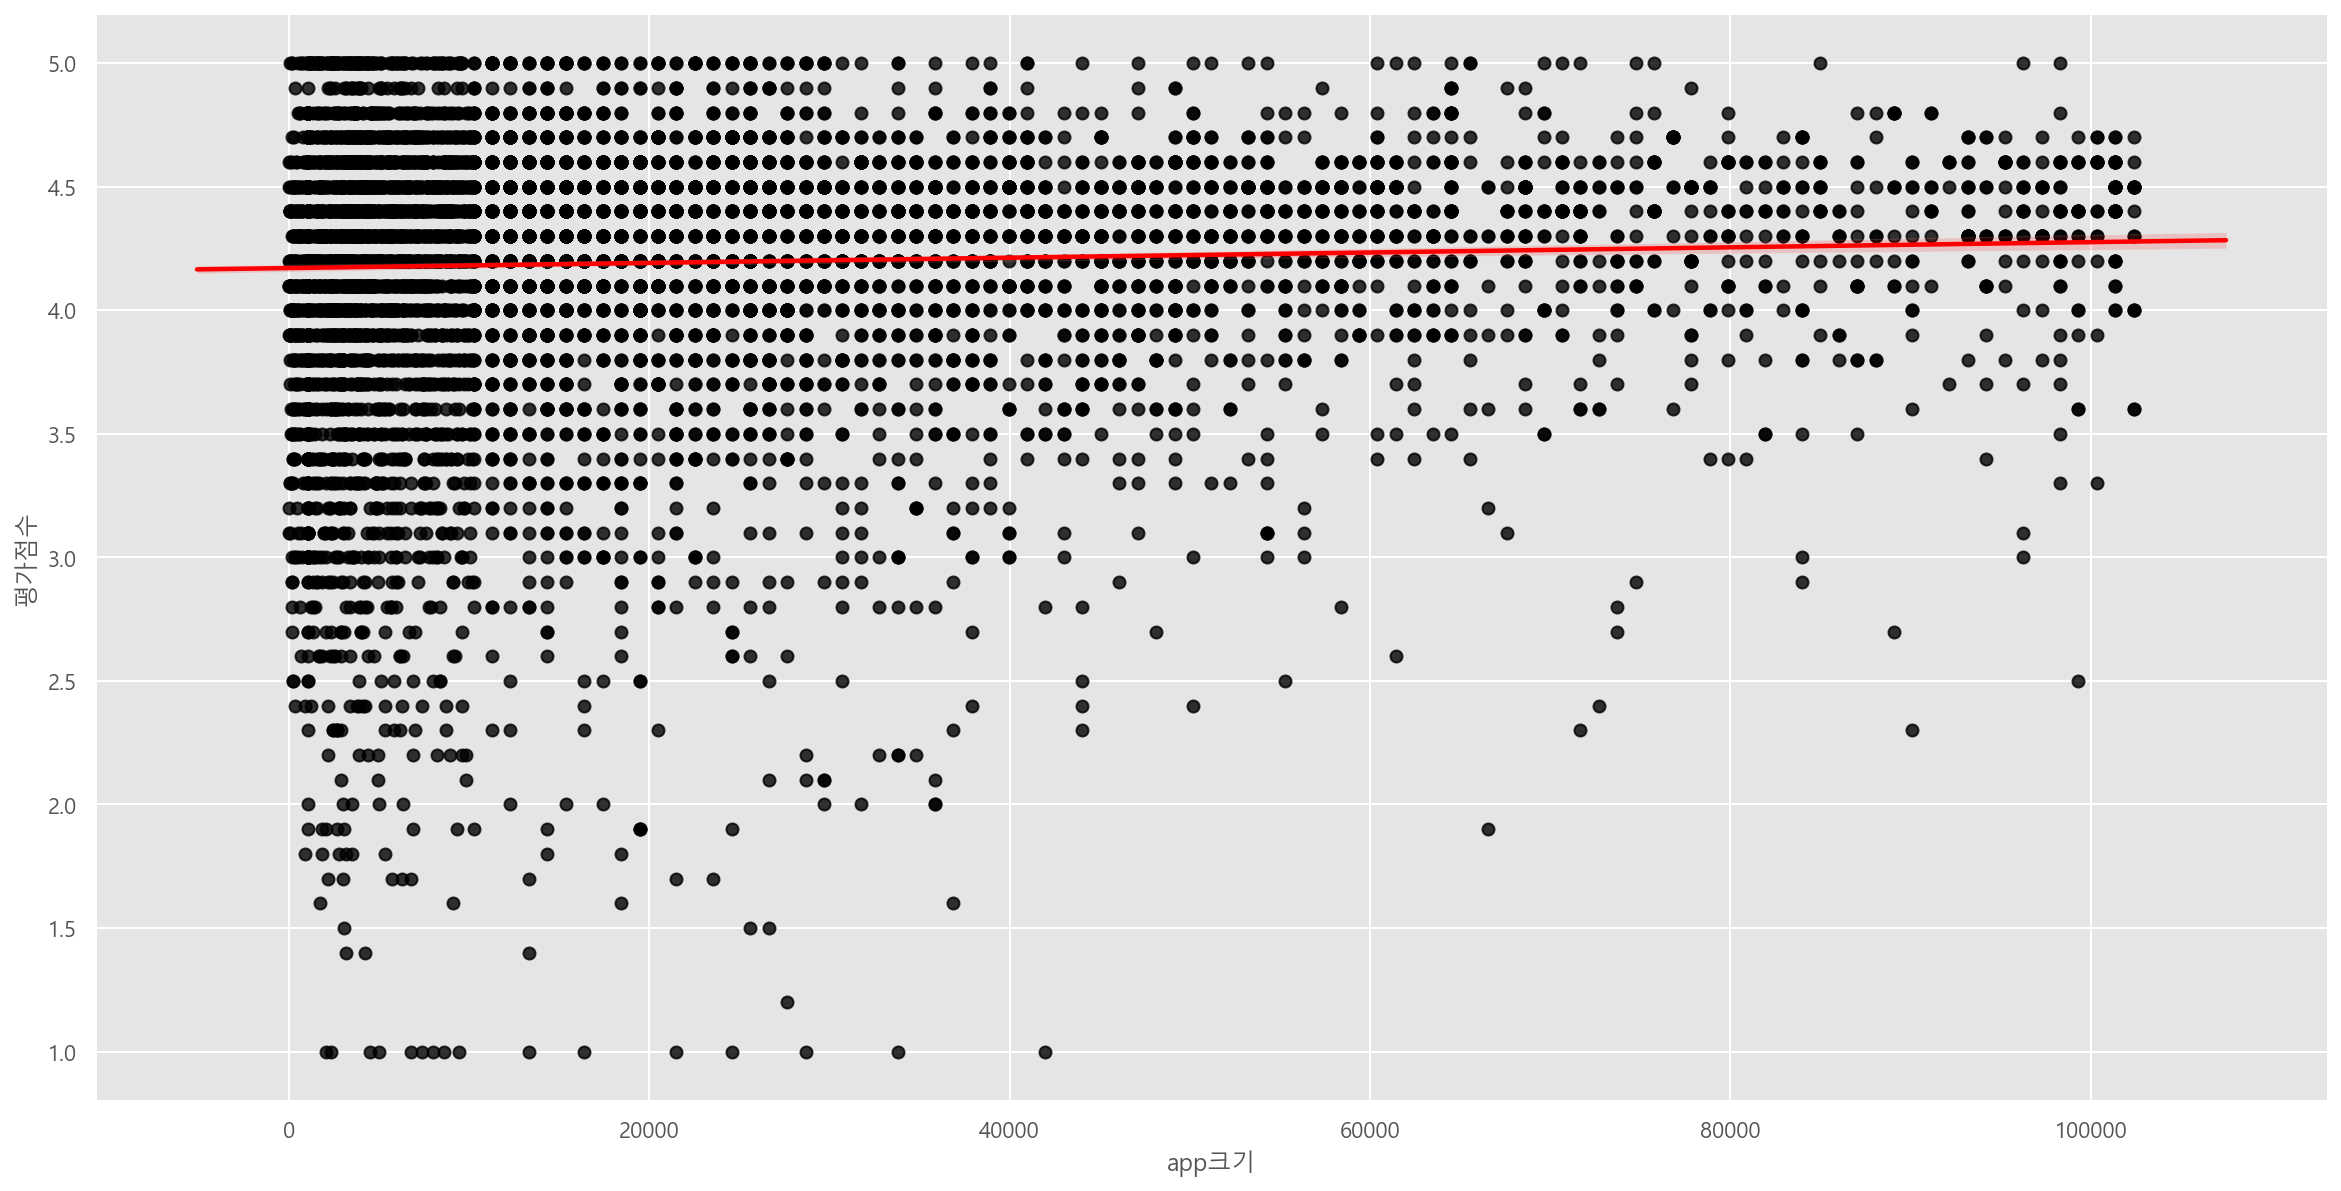

In [83]:
plt.figure(figsize = (20,10))
ax =sns.regplot(x= New_Data.app크기,y = New_Data.평가점수,data = New_Data,scatter_kws = {'color' : 'black'},line_kws={'color':'red'})
plt.show()
ax.figure.savefig('test.png')

거의 영향 없네

## 유료구분, 가격을 체크해보자
- 무료와 유료의 평점 차이가 있을까?
- 없다..? 개수에서부터 차이가 나는데 그럼 산포가 어떻게 되는 지 살펴보자

In [84]:
New_Data[['유료구분','평가점수']].groupby('유료구분').mean() # 평균

,평가점수
유료구분,
Free,4.185940
Paid,4.266615


In [85]:
New_Data[['유료구분','평가점수']].groupby('유료구분').count() # 개수

,평가점수
유료구분,
Free,8720
Paid,647


In [86]:
labels = New_Data[['유료구분','평가점수']].groupby('유료구분').count().index
explode = (0.2,0)

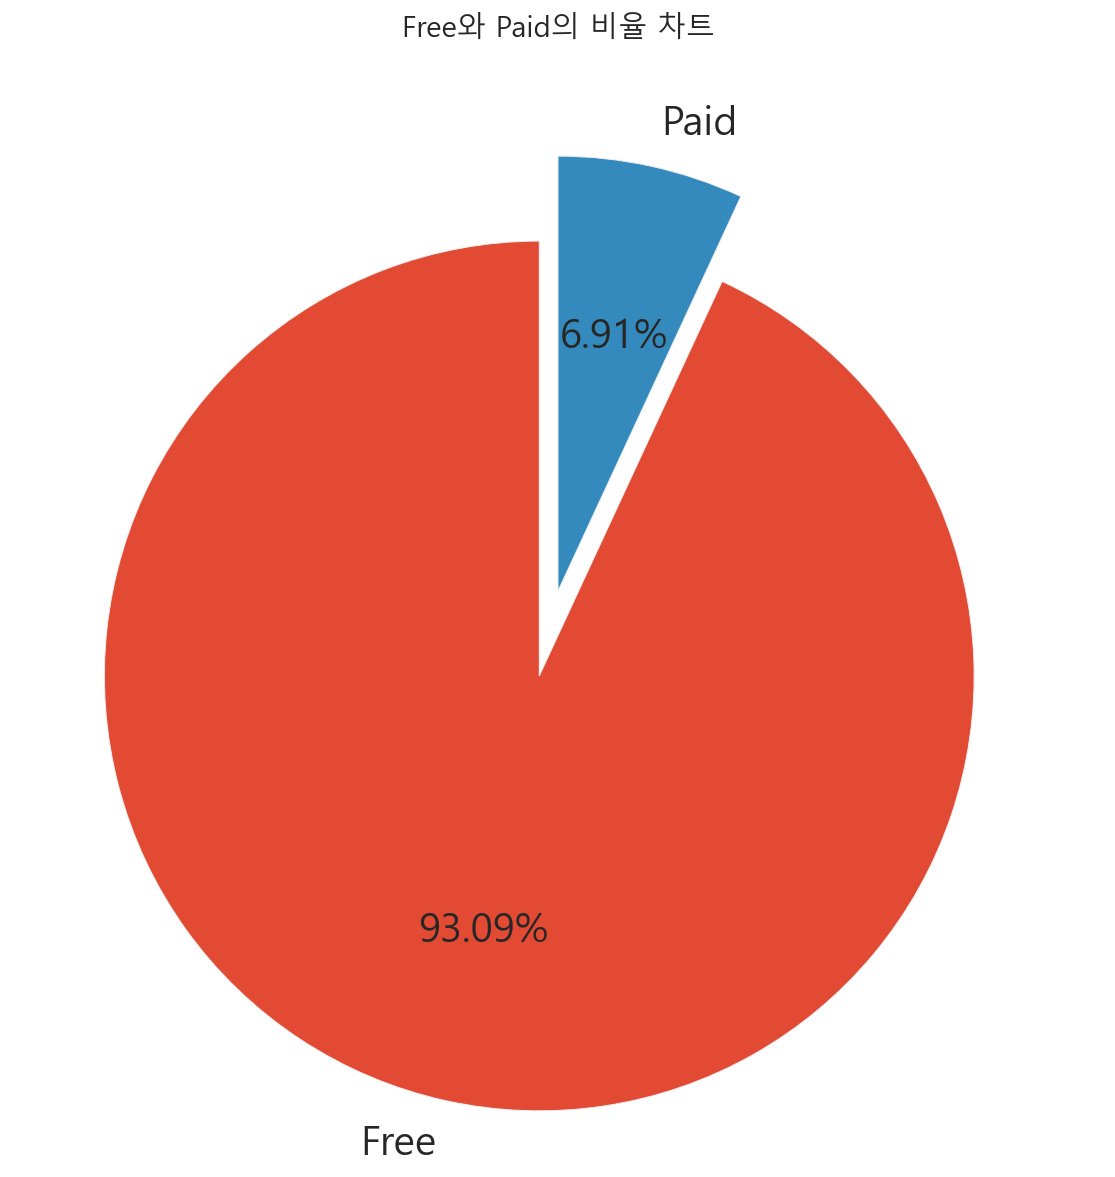

In [87]:
plt.figure(figsize = (20,10))
plt.pie(New_Data[['유료구분','평가점수']].groupby('유료구분').count()['평가점수'],
       explode = explode,
       labels = labels,
       autopct= '%1.2f%%',
       startangle = 90,
       textprops = {'fontsize' : 20})
plt.title('Free와 Paid의 비율 차트')
plt.show()

In [88]:
25000 * 75

1875000

In [89]:
Price_data = dict(list(New_Data[['유료구분','평가점수']].groupby('유료구분')))

In [90]:
Free = Price_data['Free']
Free.describe()

,평가점수
count,8720.000000
mean,4.185940
std,0.512893
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


In [91]:
Paid = Price_data["Paid"]
Paid.describe()

,평가점수
count,647.000000
mean,4.266615
std,0.547523
min,1.000000
25%,4.100000
50%,4.400000
75%,4.600000
max,5.000000


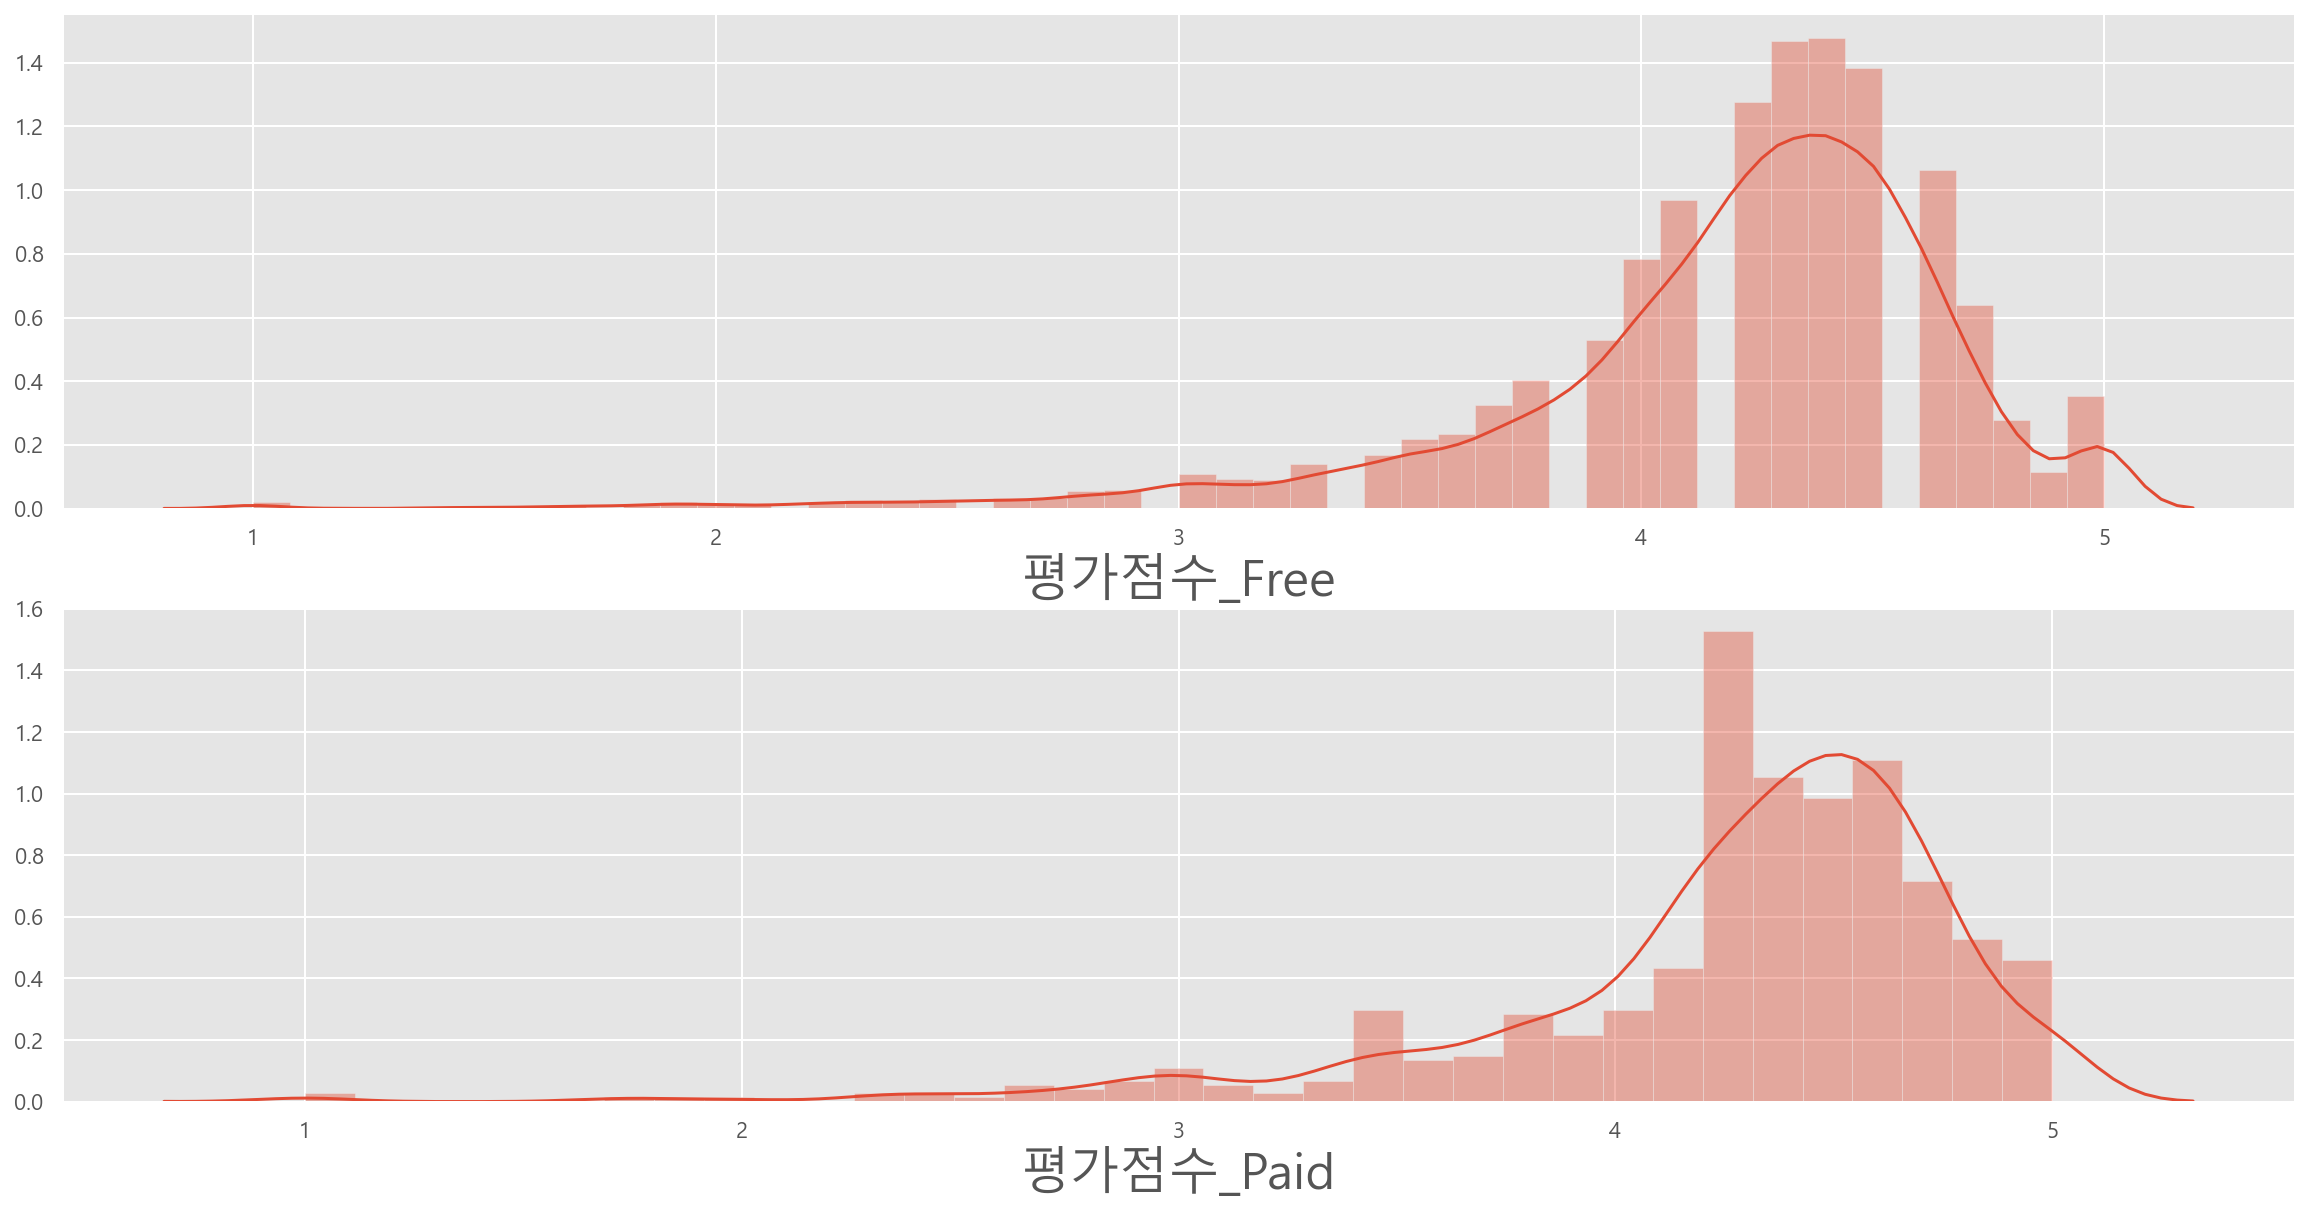

In [92]:
plt.figure(figsize = (20,10))

plt.subplot(2,1,1)
sns.distplot(Free['평가점수'])
plt.xlabel('평가점수_Free',fontsize = 25)

plt.subplot(2,1,2)
sns.distplot(Paid['평가점수'])
plt.xlabel('평가점수_Paid',fontsize = 25)

plt.show()

- 가격 살펴보자
- 그럼 가격과 평가점수와의 관계는 어떠하지??

In [93]:
Fee_Data = New_Data[New_Data.유료구분 == 'Paid']

In [94]:
Fee_Data.가격 = Fee_Data.가격.apply(lambda x : float(x.replace('$',"")))

In [95]:
Fee_Data.가격.describe()

count    647.000000
mean      13.910433
std       58.704314
min        0.990000
25%        1.990000
50%        2.990000
75%        4.990000
max      400.000000
Name: 가격, dtype: float64

In [96]:
# 가장 비싼 어플.. "I'm Rich - Trump Edition"
Fee_Data.iloc[np.argmax(Fee_Data.가격.values),0]

"I'm Rich - Trump Edition"

In [97]:
x, y = Fee_Data[['평가점수','가격']].가격, Fee_Data[['평가점수','가격']].평가점수

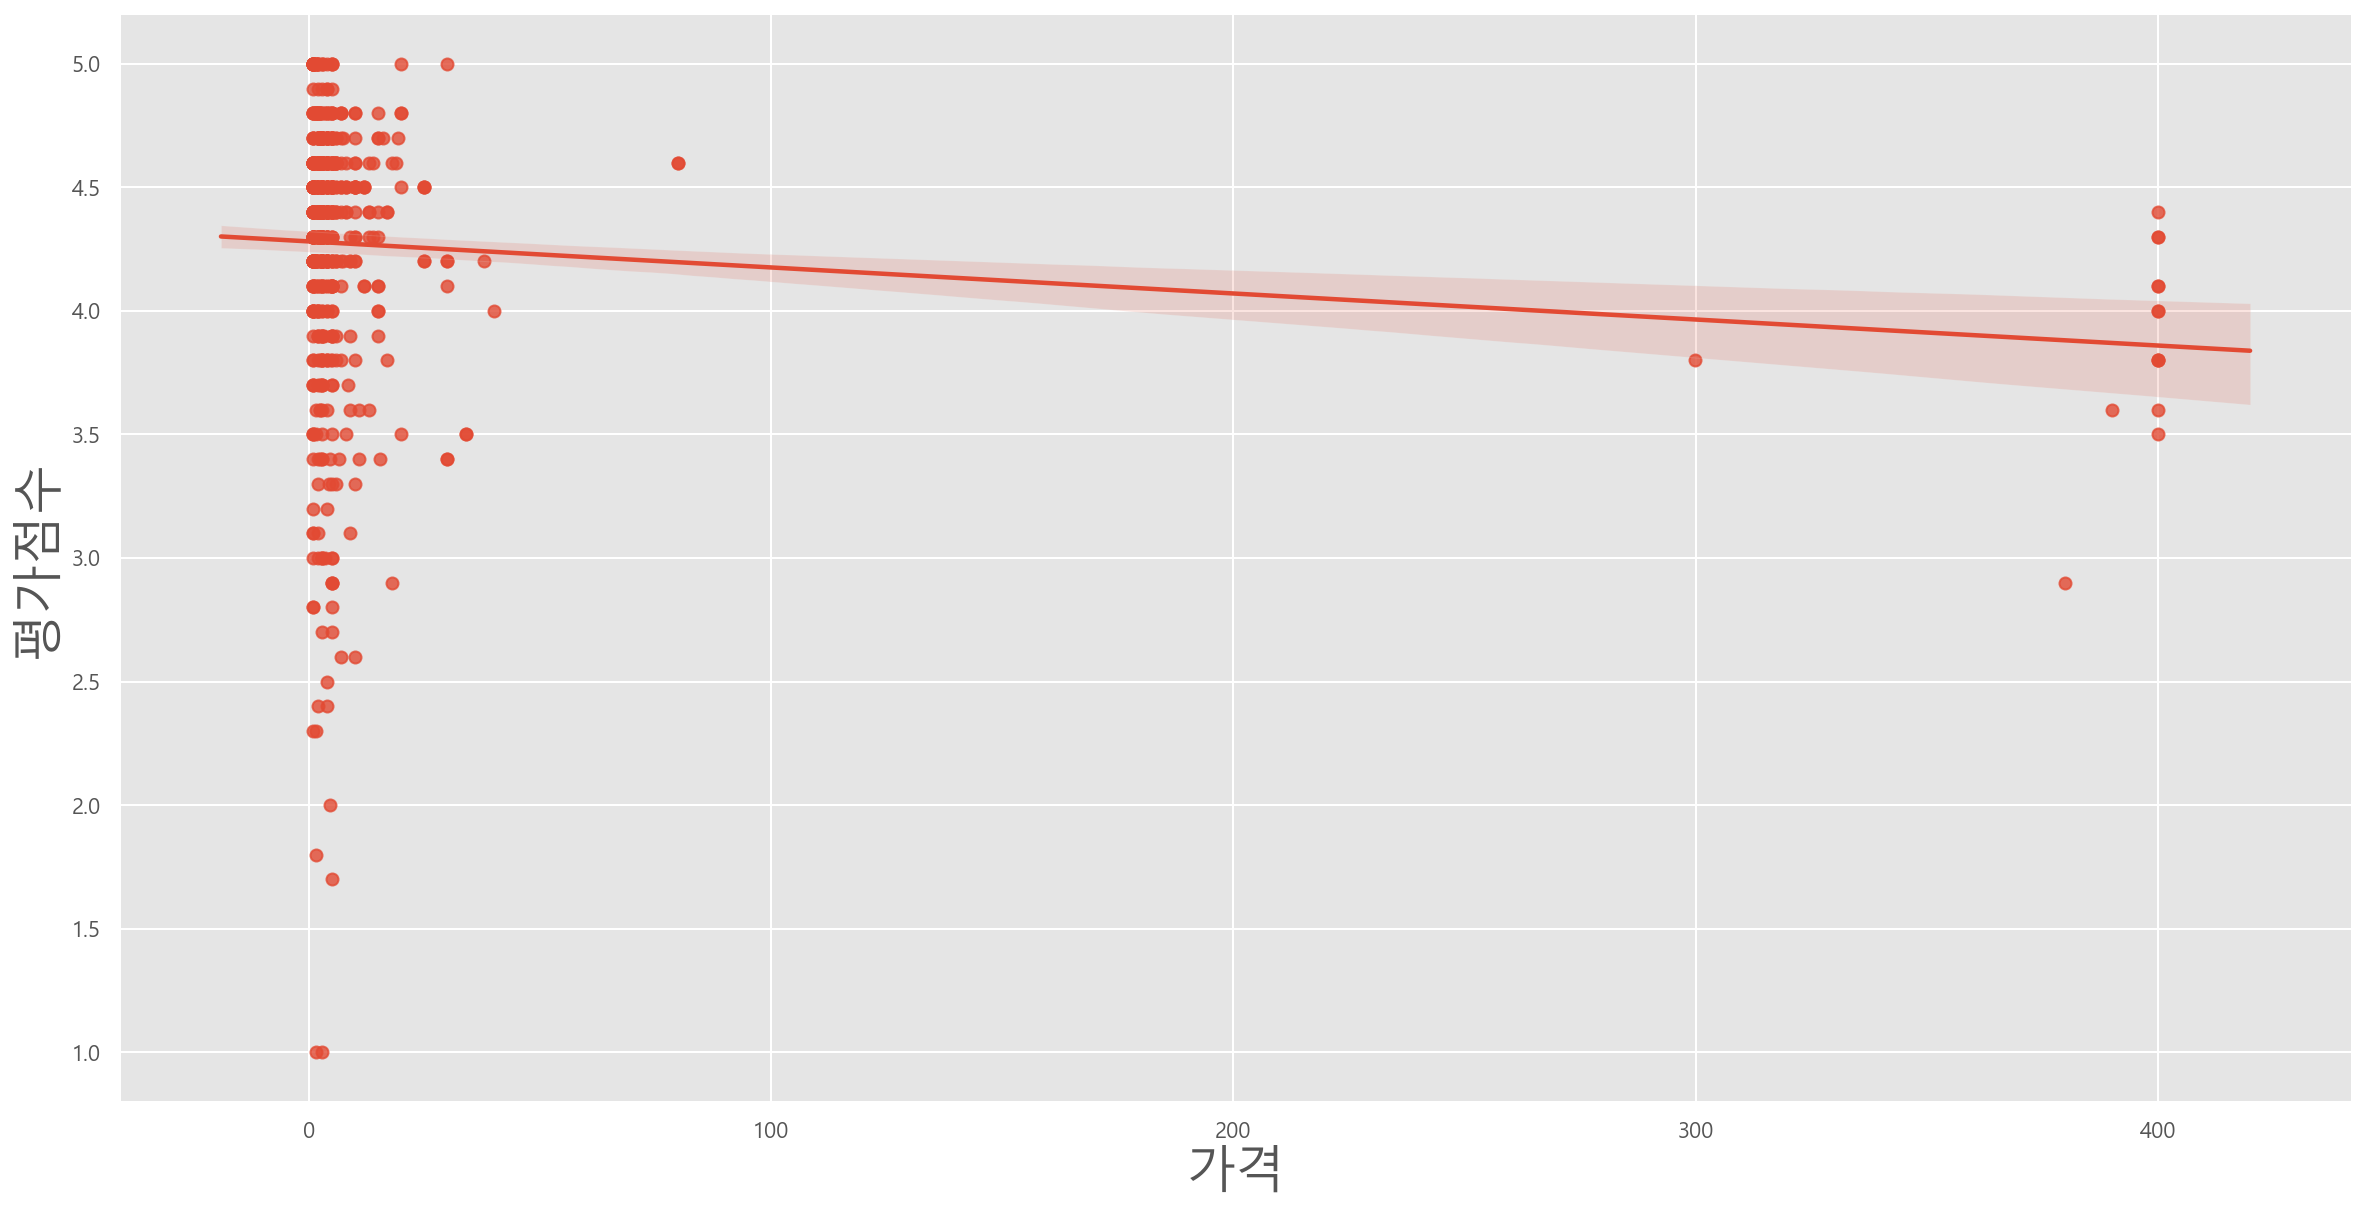

In [98]:
plt.figure(figsize = (20,10))
sns.regplot(x,y,data = Fee_Data)
plt.xlabel('가격',fontsize = 25)
plt.ylabel('평가점수',fontsize = 25)
plt.show()

가격이 높을수록 평가점수가 다소 낮구나...

New_Data에 갱신

In [99]:
test_copy.loc[Fee_Data.index,'가격'] = Fee_Data['가격']

In [100]:
test_copy.가격.value_counts()

0       8720
2.99     114
0.99     107
4.99      70
1.99      59
        ... 
1.61       1
14.0       1
4.59       1
1.2        1
1.5        1
Name: 가격, Length: 73, dtype: int64

In [101]:
New_Data.가격 = test_copy.가격

## 연령구분 분석해보자
- 종류는?

In [102]:
Kind = New_Data[['평가점수','이용가능연령구분']].groupby('이용가능연령구분').count()
Kind

,평가점수
이용가능연령구분,
Adults only 18+,3
Everyone,7421
Everyone 10+,397
Mature 17+,461
Teen,1084
Unrated,1


In [103]:
# 아니 왜 죄다 평점 평균이 비스무리해..?
New_Data[['평가점수','이용가능연령구분']].groupby('이용가능연령구분').mean()

,평가점수
이용가능연령구분,
Adults only 18+,4.300000
Everyone,4.186067
Everyone 10+,4.257179
Mature 17+,4.123427
Teen,4.233487
Unrated,4.100000


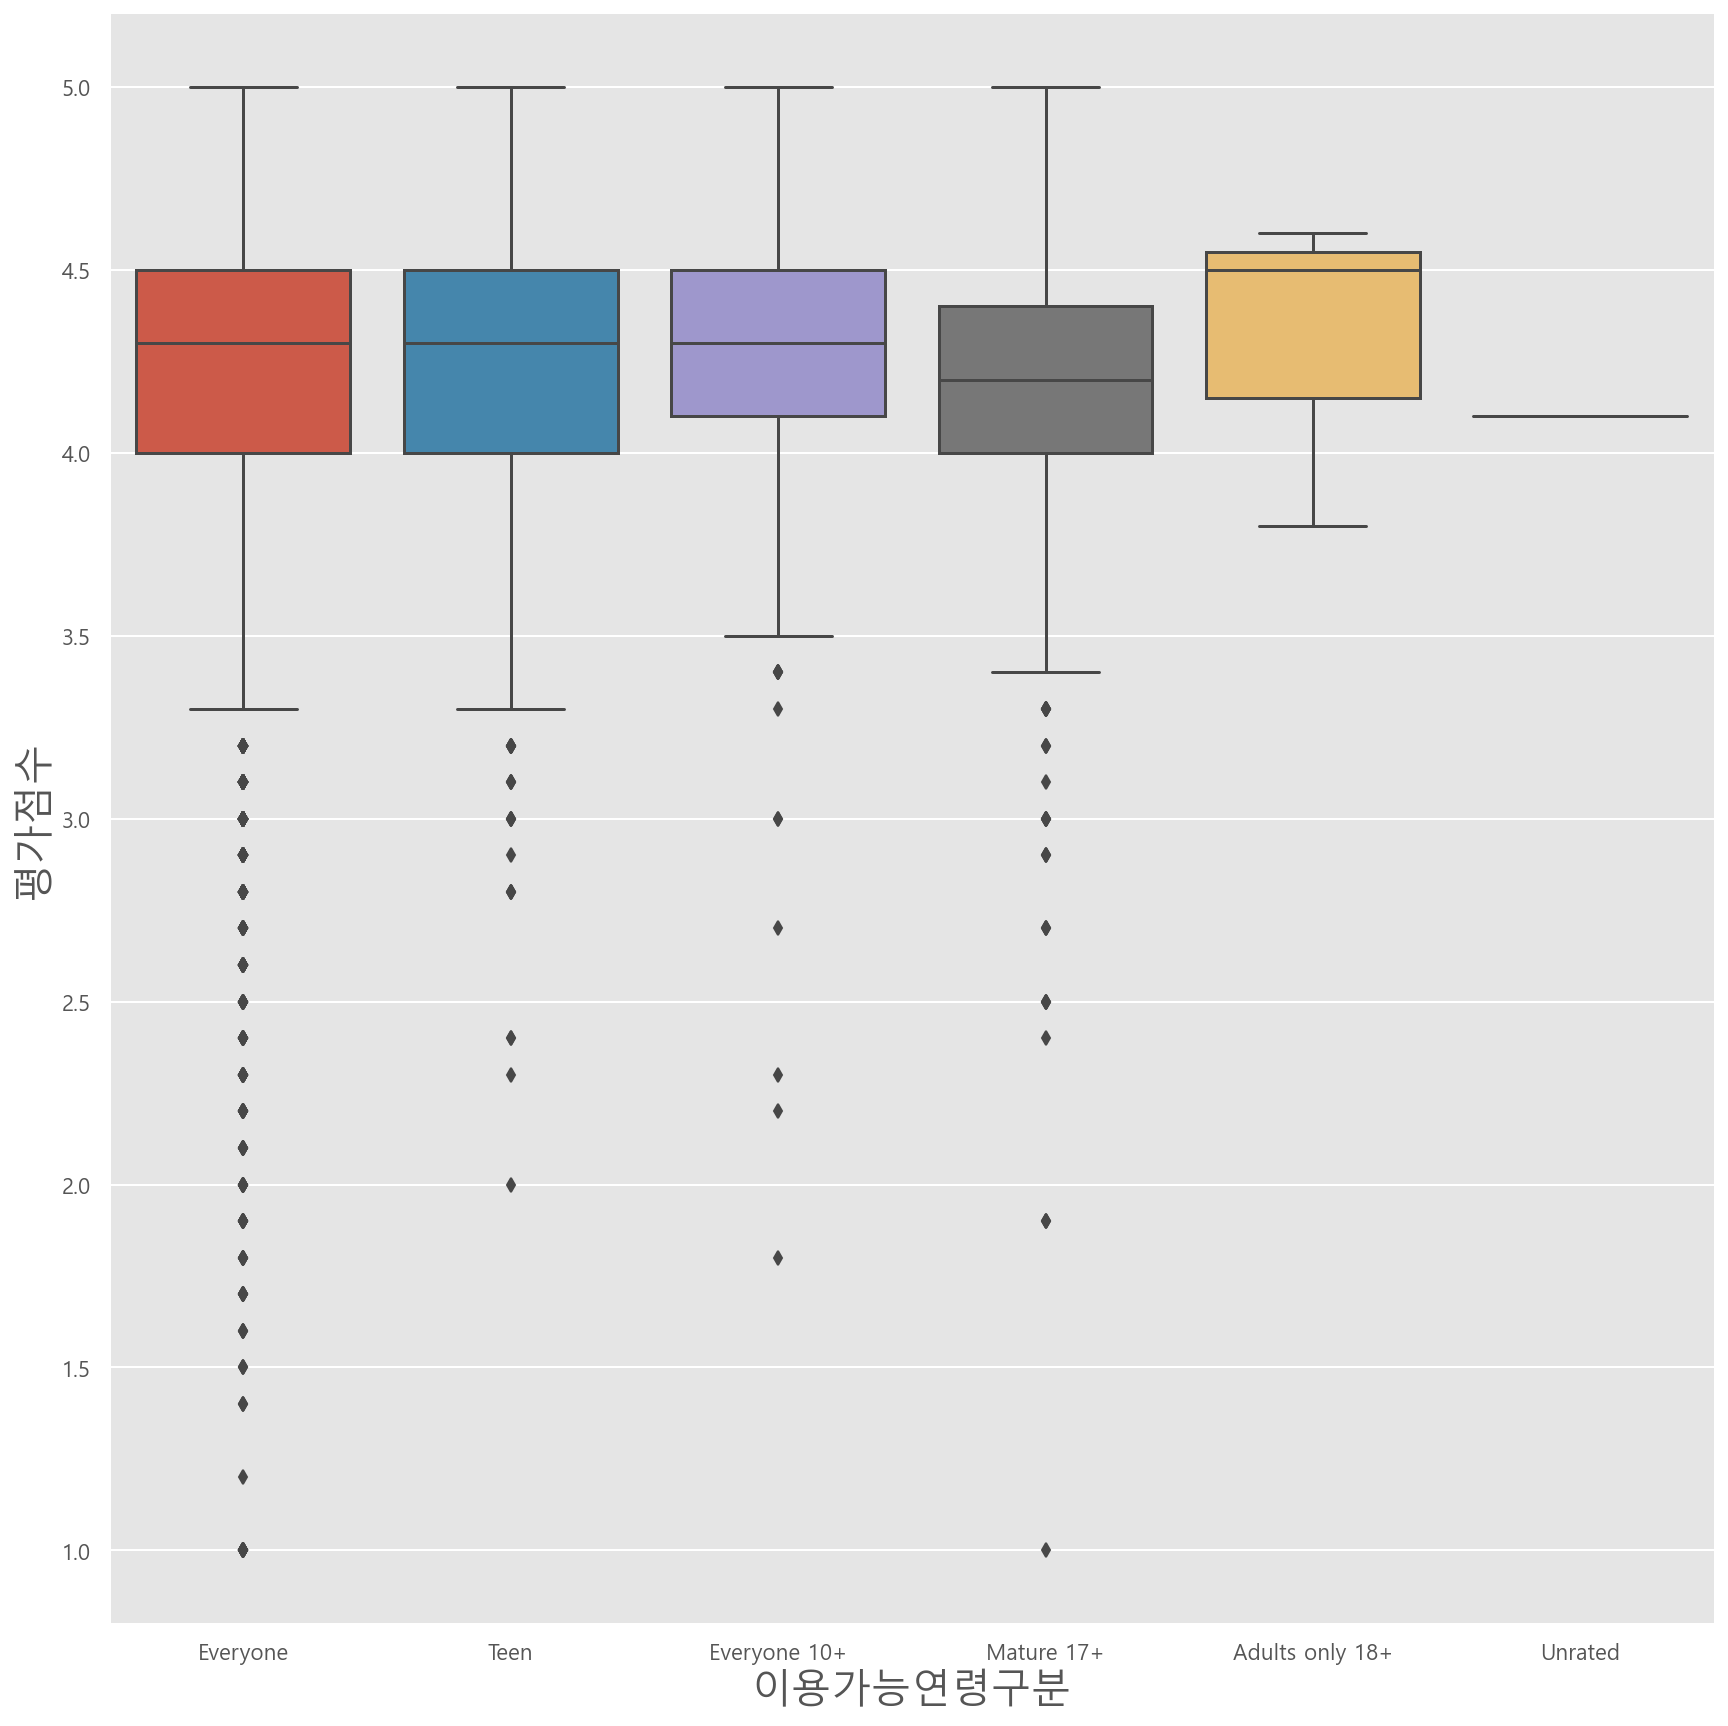

In [104]:
# catplot은 Facetgrid형태이다보니 조정방식이 다름
sns.catplot(x= "이용가능연령구분", y ='평가점수', data = New_Data, kind = 'box',height = 12)
plt.xlabel('이용가능연령구분', fontsize = 20)
plt.ylabel('평가점수', fontsize = 20)
plt.show()

연령구분별로 평가점수 분포를 살펴봤는데 별 상관 없다.

## 업데이트

잠시 보류.......

In [105]:
Month_data = New_Data.마지막업데이트.str.split(' ').str[0]

In [106]:
Month_data

0        January
1        January
2         August
3           June
4           June
          ...   
10834       June
10836       July
10837       July
10839    January
10840       July
Name: 마지막업데이트, Length: 9367, dtype: object

In [107]:
Month_data.unique()

array(['January', 'August', 'June', 'March', 'April', 'September', 'July',
       'October', 'November', 'May', 'December', 'February'], dtype=object)

In [108]:
Month_dict = {"January" : 1, 'February' : 2, 'March' : 3, 'April' : 4, 'May' : 5,'June':6,'July' : 7,'August' : 8,'September' : 9,'October' : 10, "November" : 11, "December" : 12  }

In [109]:
Month_data = Month_data.apply(lambda x : Month_dict[x]) # 숫자로 변환

In [110]:
Month_data

0        1
1        1
2        8
3        6
4        6
        ..
10834    6
10836    7
10837    7
10839    1
10840    7
Name: 마지막업데이트, Length: 9367, dtype: int64

In [111]:
BBB = New_Data.마지막업데이트.str.split(' ').str[1:]

In [112]:
Day = BBB.str[0].apply(lambda x : int(x.replace(',','')))
Day

0         7
1        15
2         1
3         8
4        20
         ..
10834    18
10836    25
10837     6
10839    19
10840    25
Name: 마지막업데이트, Length: 9367, dtype: int64

In [113]:
Year = BBB.str[1].apply(lambda x : int(x))

In [114]:
New_Data['업데이트_월'] = Month_data
New_Data['업데이트_일'] = Day
New_Data['업데이트_연도'] = Year

In [115]:
New_Data.shape

(9367, 16)

In [116]:
Test_Data = New_Data.drop(["마지막업데이트"],axis = 1)

In [117]:
Test_Data[['평가점수','업데이트_월','업데이트_일','업데이트_연도']]

,평가점수,업데이트_월,업데이트_일,업데이트_연도
0,4.1,1,7,2018
1,3.9,1,15,2018
2,4.7,8,1,2018
3,4.5,6,8,2018
4,4.3,6,20,2018
...,...,...,...,...
10834,4.0,6,18,2017
10836,4.5,7,25,2017
10837,5.0,7,6,2018
10839,4.5,1,19,2015


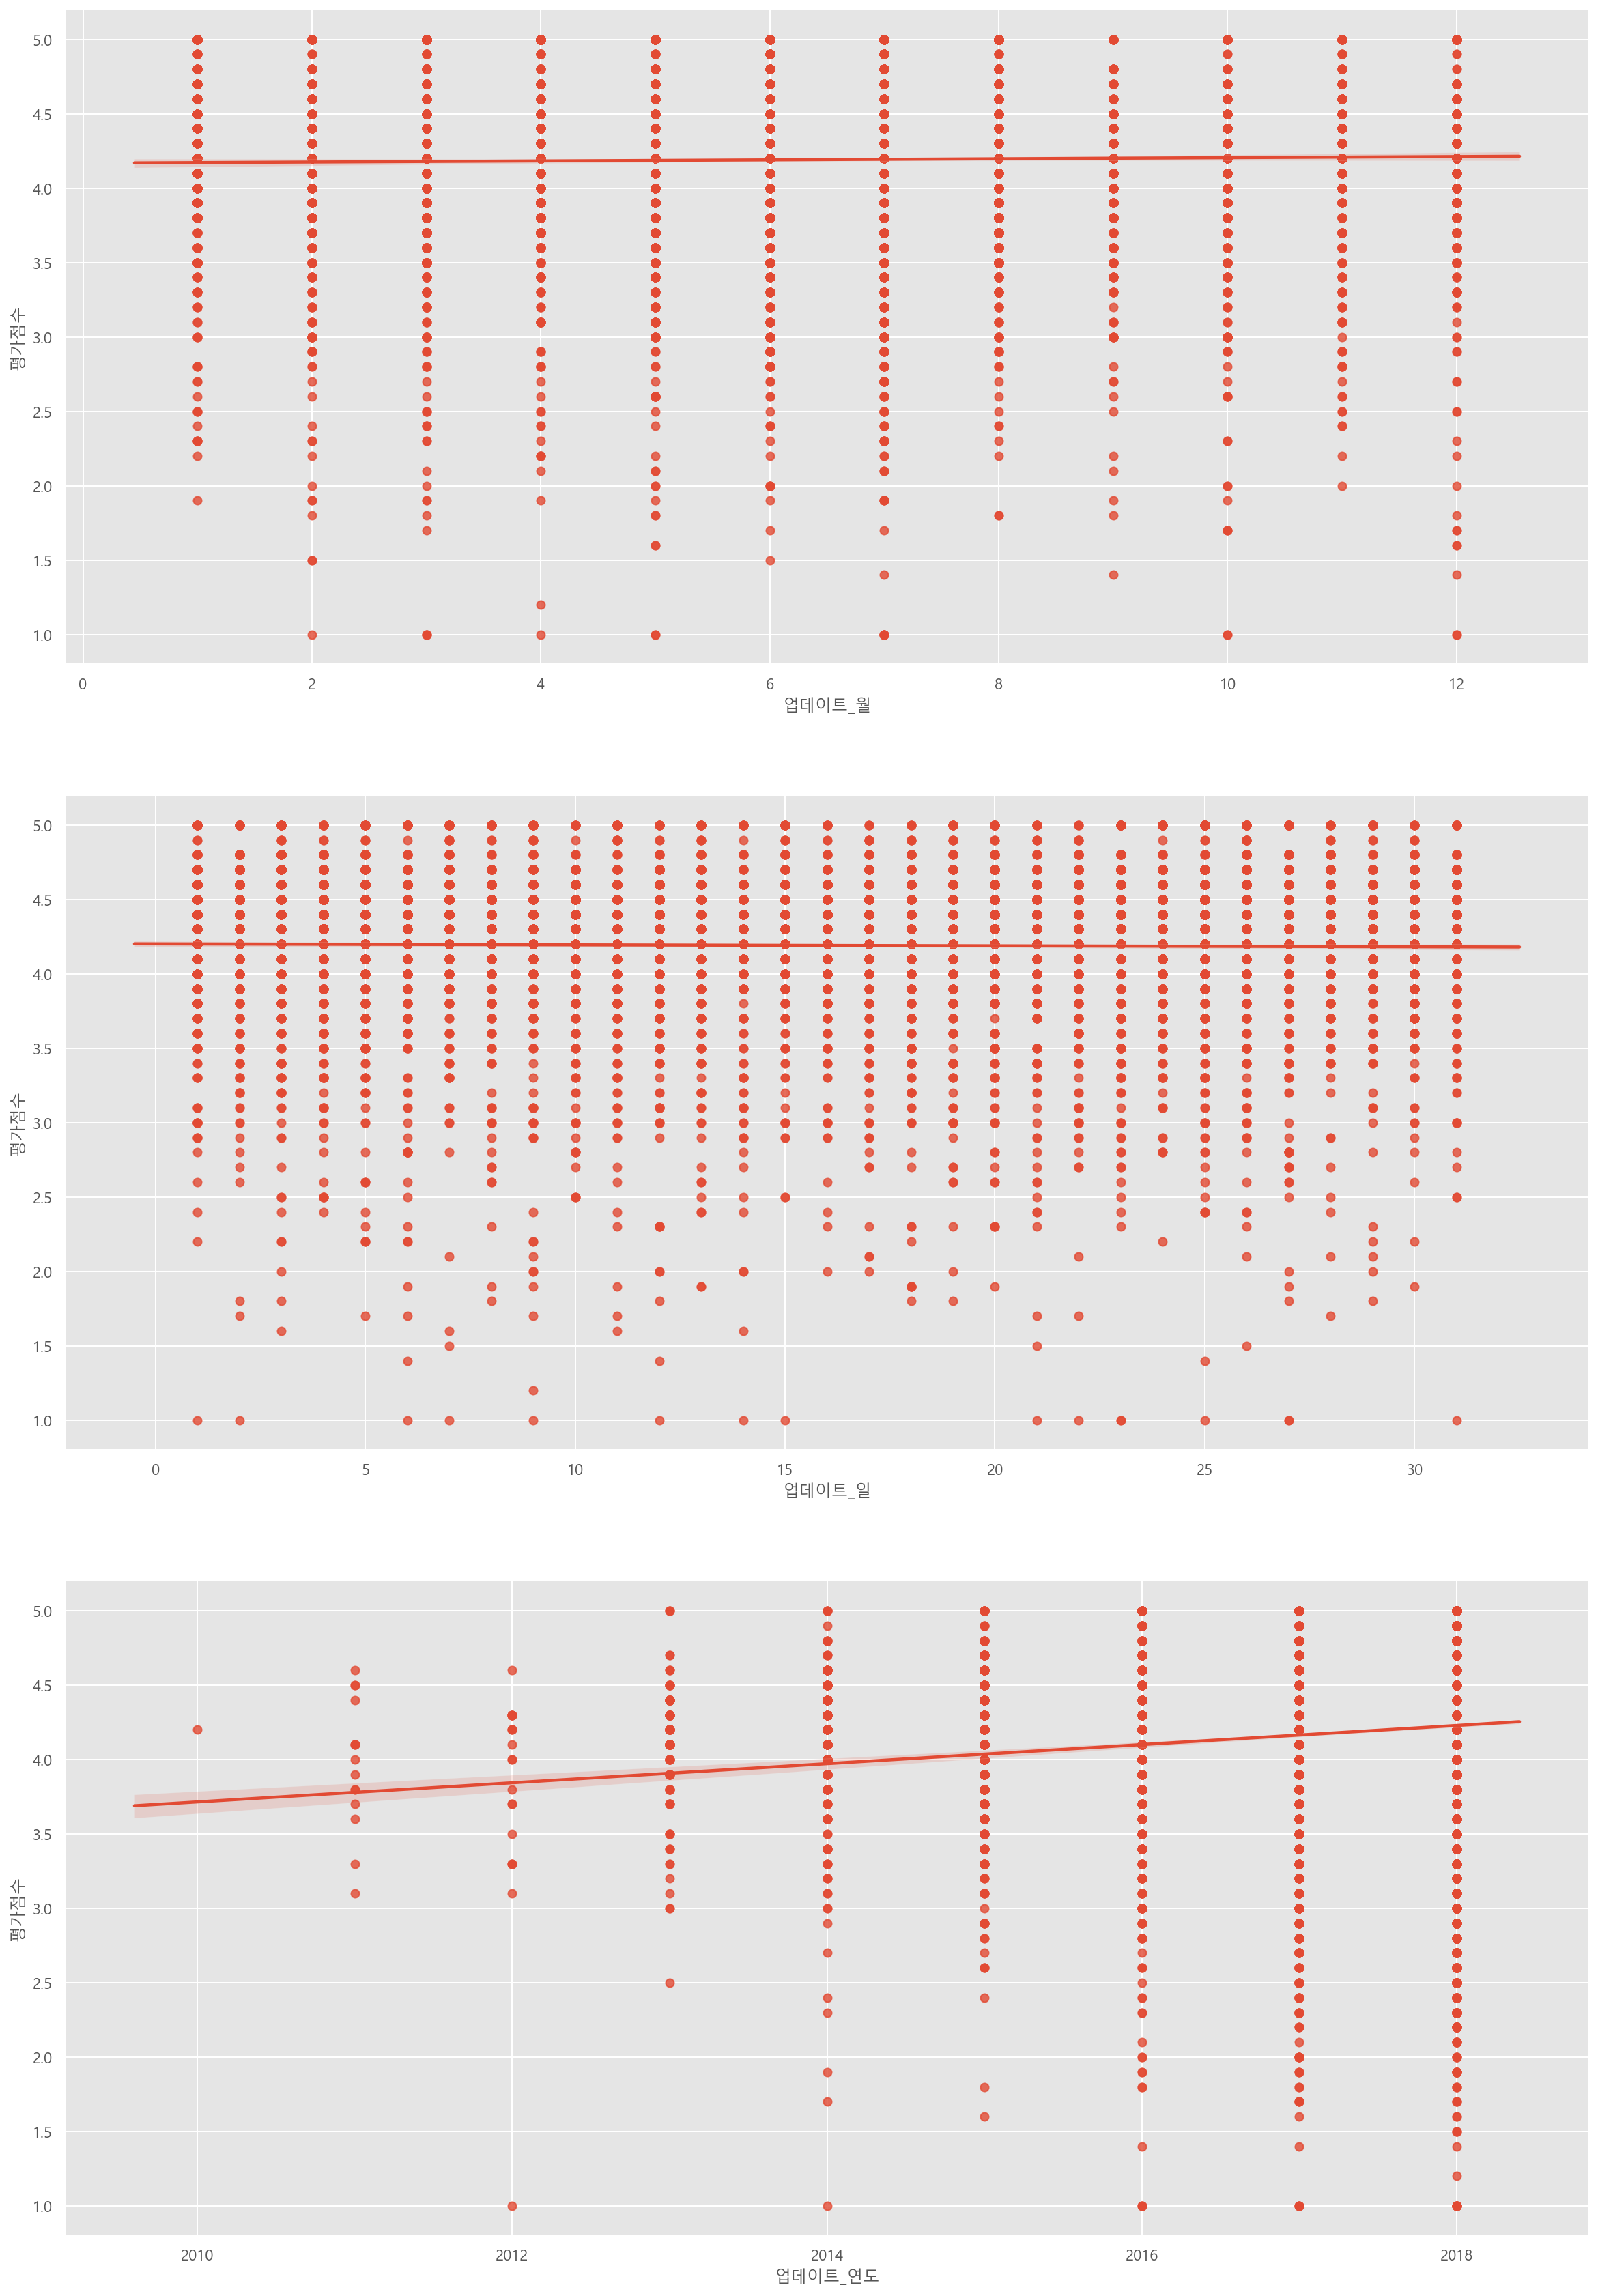

In [118]:
plt.figure(figsize  = (20,30))
plt.subplot(3,1,1)
sns.regplot(Test_Data.업데이트_월,Test_Data.평가점수)

plt.subplot(3,1,2)
sns.regplot(Test_Data.업데이트_일,Test_Data.평가점수)

plt.subplot(3,1,3)
sns.regplot(Test_Data.업데이트_연도,Test_Data.평가점수)

솔직히 일수,, 는 별 효과가 없음..<br>
월 수를 따져보면 별 효과가 없음...,<br>
최근연도에 업데이트를 하면 효과가 있음.<br>

In [119]:
Recent_Year = dict(list(Test_Data[['평가점수','업데이트_월','업데이트_일','업데이트_연도']].groupby('업데이트_연도')))

In [120]:
Test_Data[['평가점수','업데이트_월','업데이트_일','업데이트_연도']].groupby('업데이트_연도').count()

,평가점수,업데이트_월,업데이트_일
업데이트_연도,,,
2010,1,1,1
2011,15,15,15
2012,21,21,21
2013,94,94,94
2014,190,190,190
2015,388,388,388
2016,651,651,651
2017,1498,1498,1498
2018,6509,6509,6509


In [121]:
list_keys = list(Recent_Year.keys())

In [122]:
Year_2018 = Recent_Year[2018]

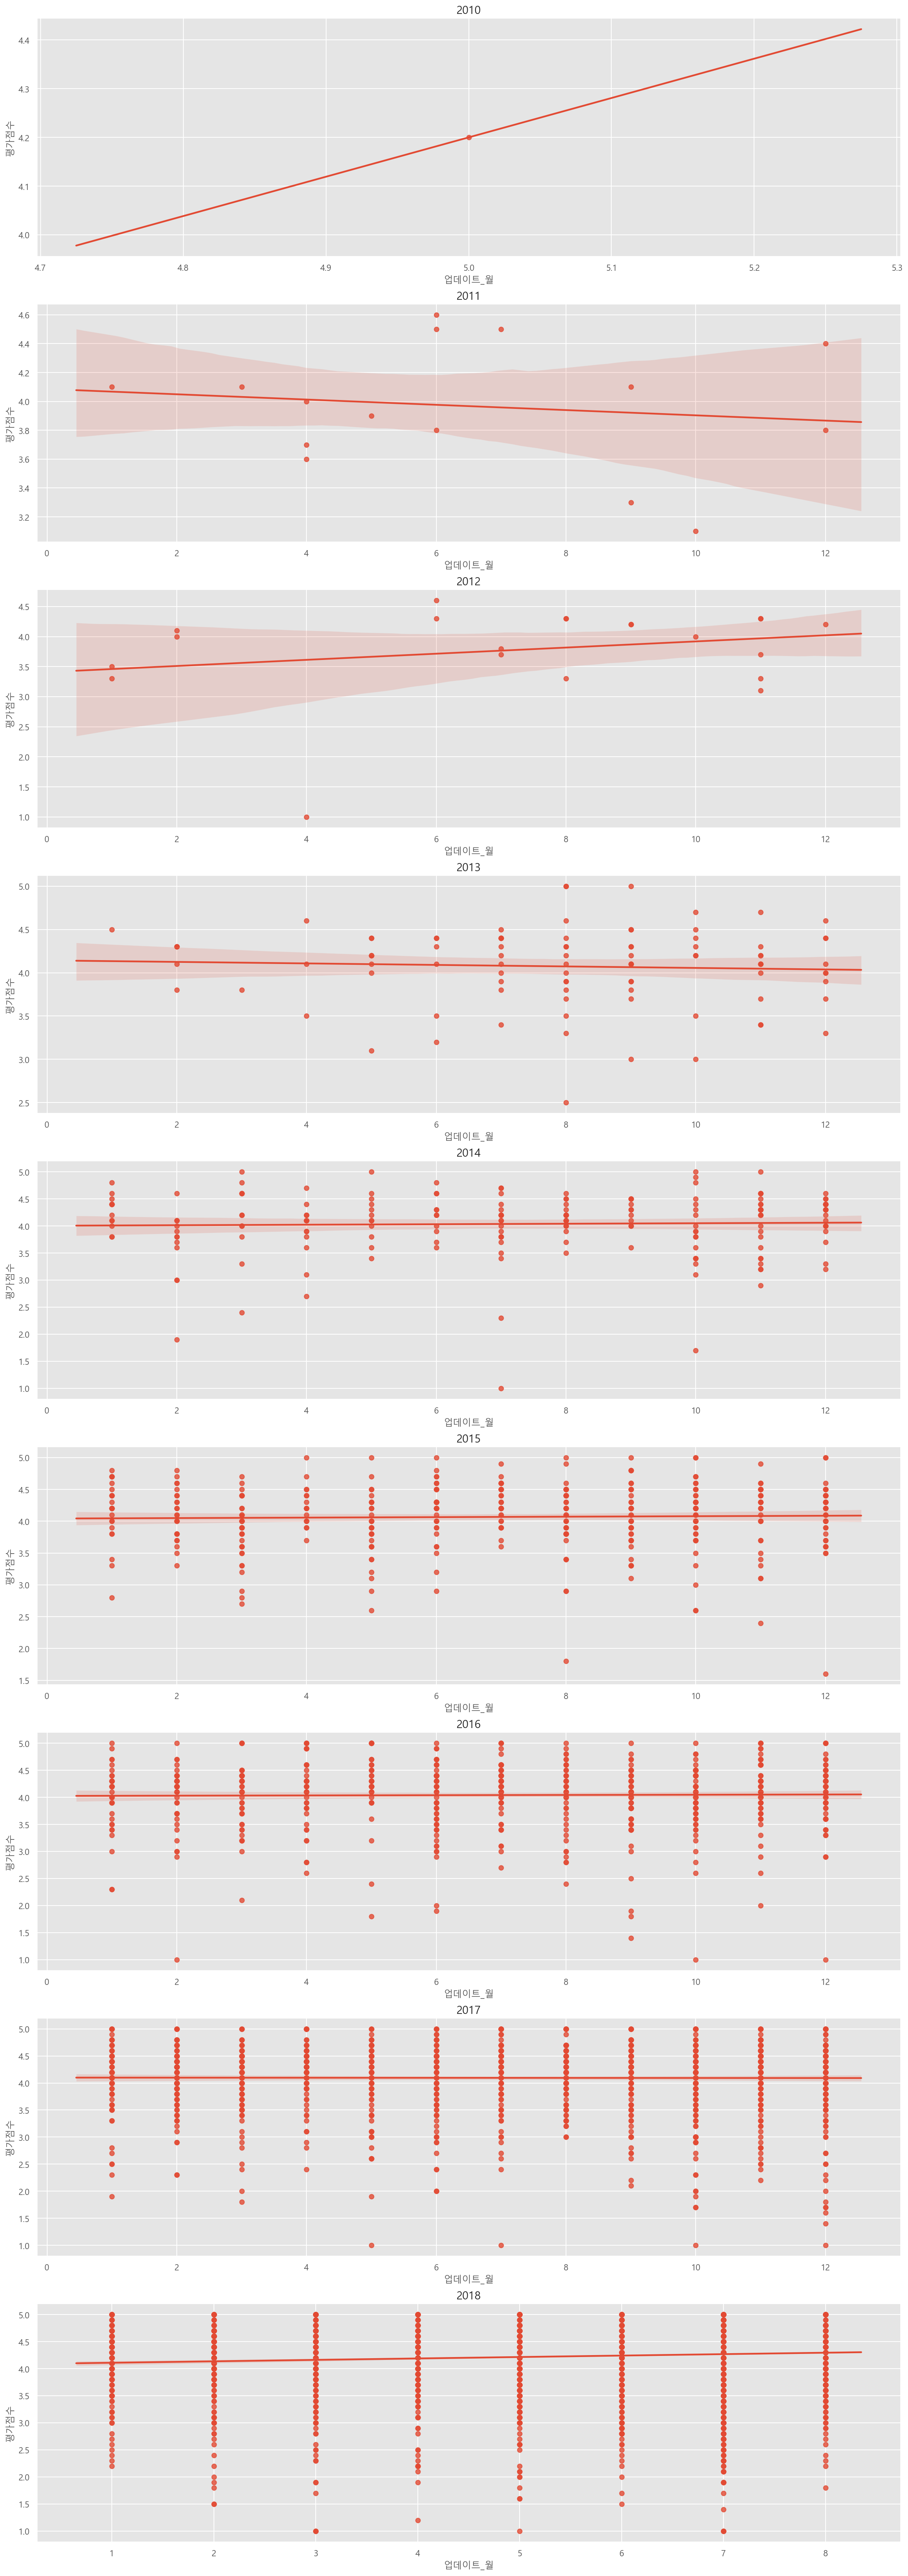

In [123]:
plt.figure(figsize = (20,60))
for i in range(len(Recent_Year.keys())):
    plt.subplot(len(Recent_Year.keys()),1,i+1)
    sns.regplot(Recent_Year[list_keys[i]].업데이트_월,Recent_Year[list_keys[i]].평가점수)
    plt.title(list_keys[i])

## 핸드폰 버전
- 업데이트 되면 자동저으로 버전 호환이 된다고 가정하고 문제 풀자..
- 이것을 어떻게 적용할 지 애매함.. 내 한계

In [124]:
TTT = Test_Data[['버전','안드로이드버전']].apply(lambda x : x.replace('Varies with device', "0"))

In [125]:
TTT.버전.str[0].value_counts()

1    3753
0    1554
2    1462
3     850
4     601
5     407
6     277
7     160
8     116
9      79
v      39
C      10
V      10
a       4
P       4
F       4
T       3
R       3
p       3
H       3
A       2
G       2
B       2
S       1
M       1
f       1
r       1
n       1
N       1
Z       1
i       1
c       1
I       1
D       1
Y       1
d       1
e       1
K       1
Name: 버전, dtype: int64

In [126]:
TTT.안드로이드버전.str[0]

0        4
1        4
2        4
3        4
4        4
        ..
10834    4
10836    4
10837    4
10839    0
10840    0
Name: 안드로이드버전, Length: 9367, dtype: object

Feature Engineering

In [127]:
Pha = New_Data['리뷰수']/New_Data["다운로드수"]

In [128]:
Pha_adjust = (Pha - min(Pha)) / (max(Pha) - min(Pha))

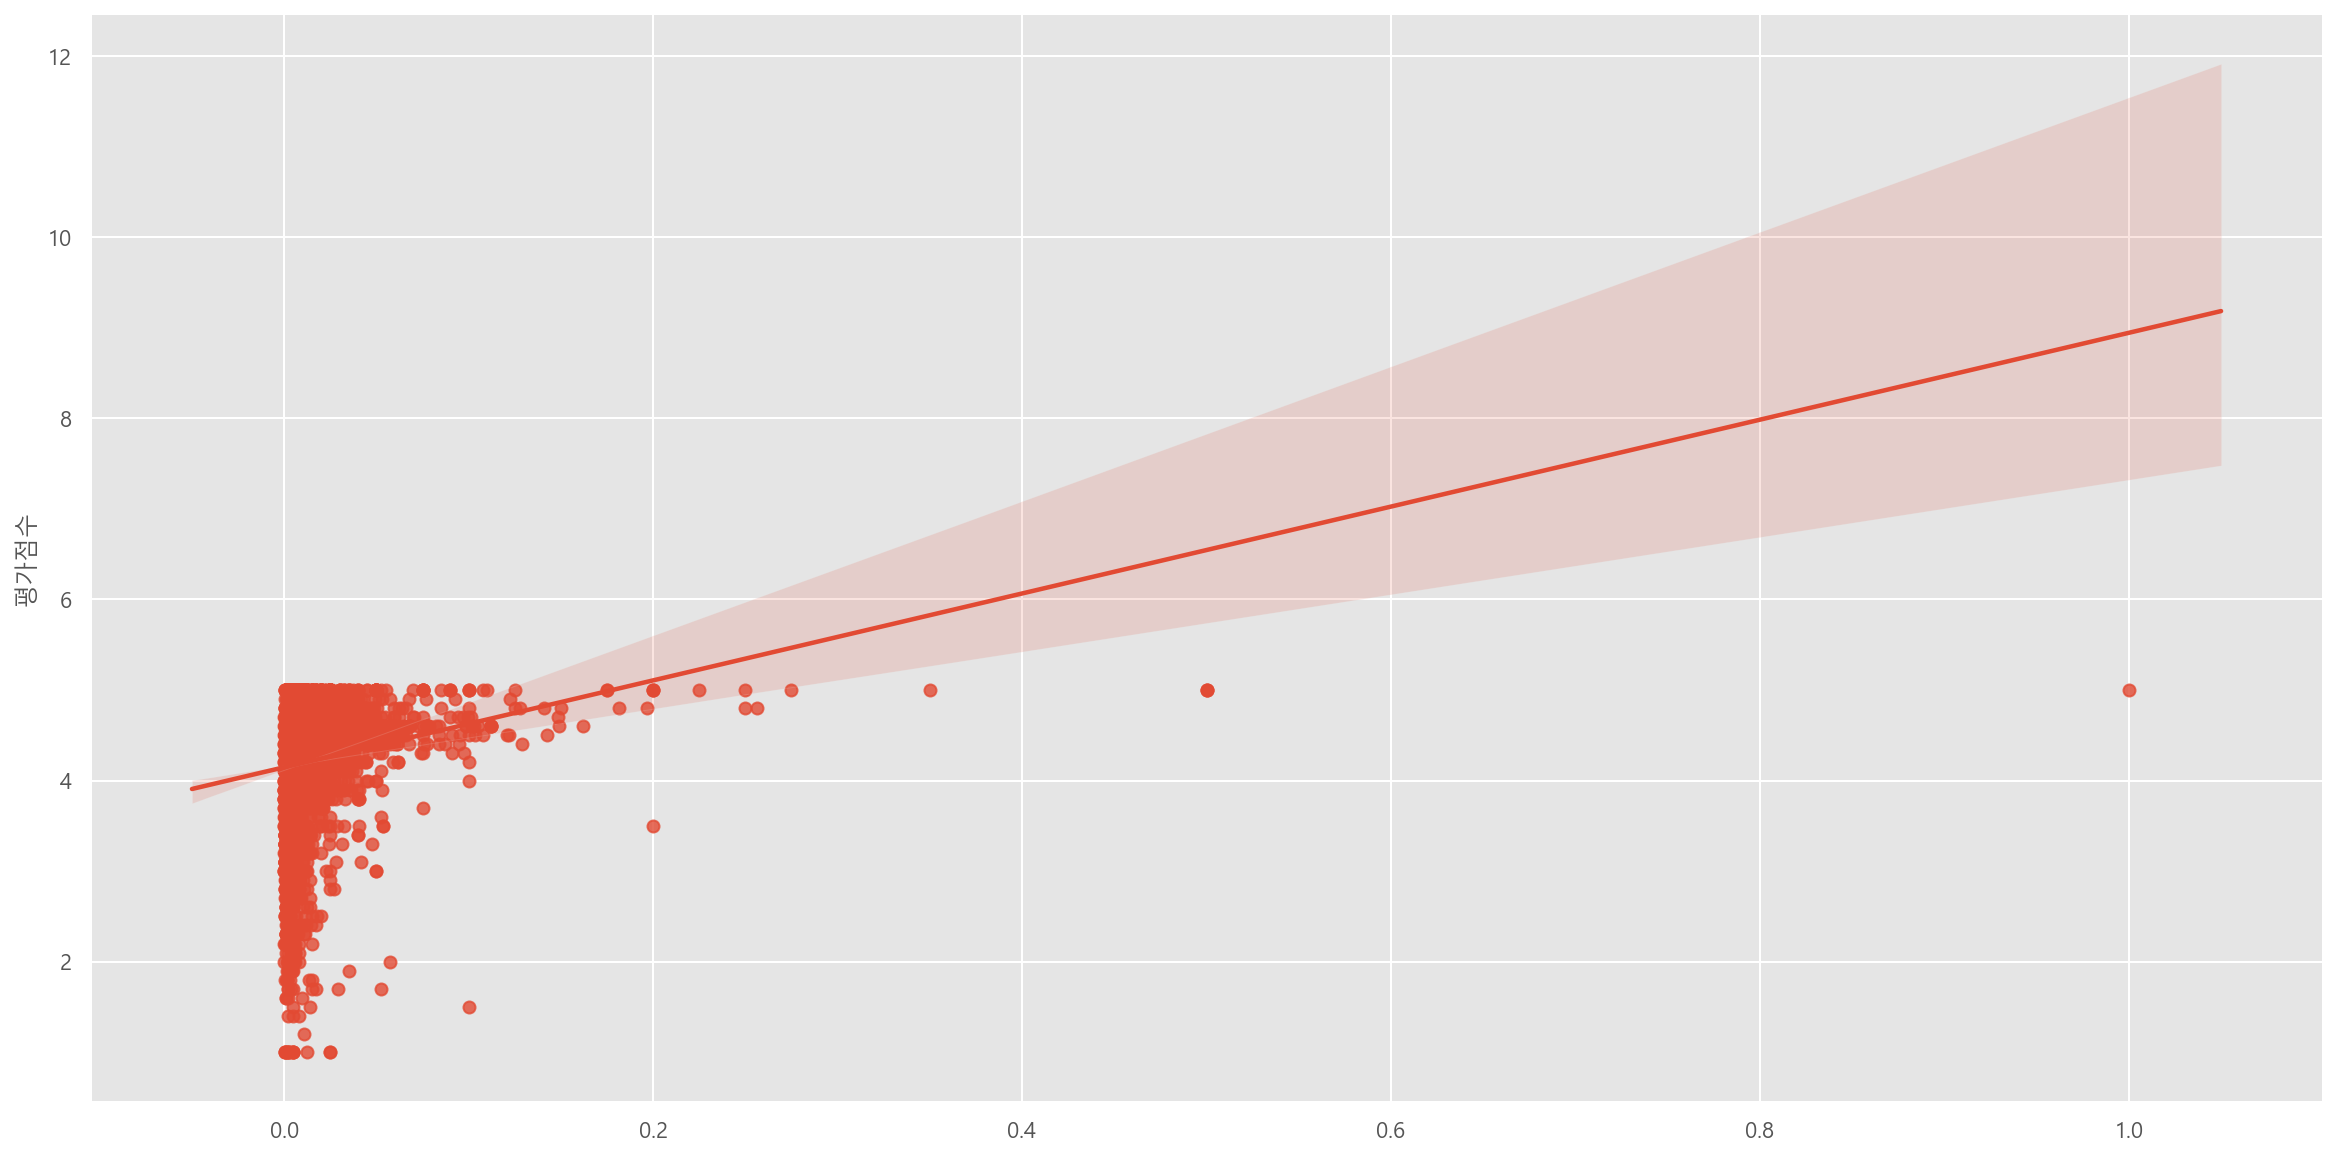

In [129]:
plt.figure(figsize = (20,10))
sns.regplot(Pha_adjust,New_Data['평가점수'])


In [130]:
Curious = New_Data.app이름.apply(lambda x : len(x))

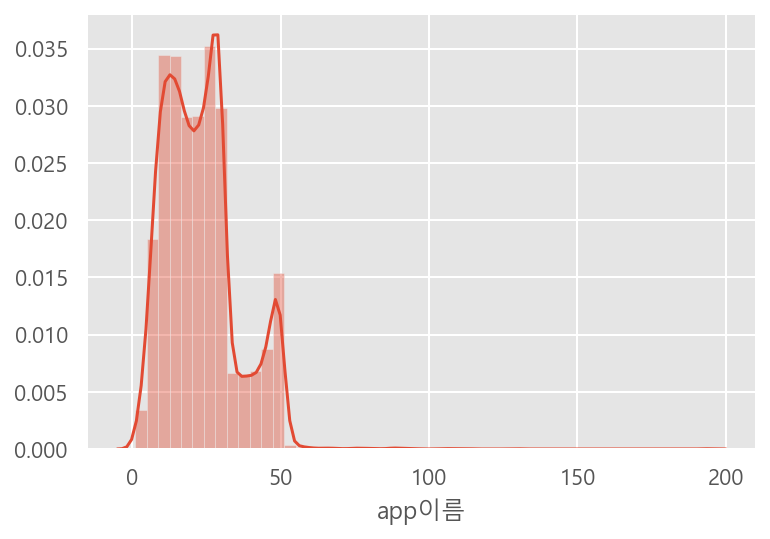

In [131]:
sns.distplot(Curious)

In [132]:
New_Data.loc[Curious[Curious.values <= 50].index,"평가점수"]

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10834    4.0
10836    4.5
10837    5.0
10839    4.5
10840    4.5
Name: 평가점수, Length: 9321, dtype: float64

In [133]:
pd.DataFrame({ "A": Curious[Curious.values <= 50].values, "B" : New_Data.loc[Curious[Curious.values <= 50].index,"평가점수"]}).corr()

,A,B
A,1.000000,0.141868
B,0.141868,1.000000


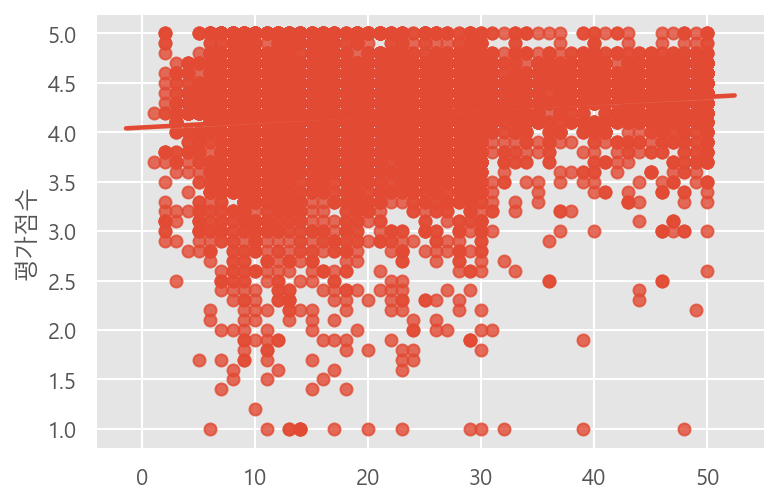

In [134]:
sns.regplot(Curious[Curious.values <= 50].values,New_Data.loc[Curious[Curious.values <= 50].index,"평가점수"])

In [135]:
pd.DataFrame({ "A": Curious.values, "B" : New_Data["평가점수"]}).corr()

,A,B
A,1.000000,0.137538
B,0.137538,1.000000


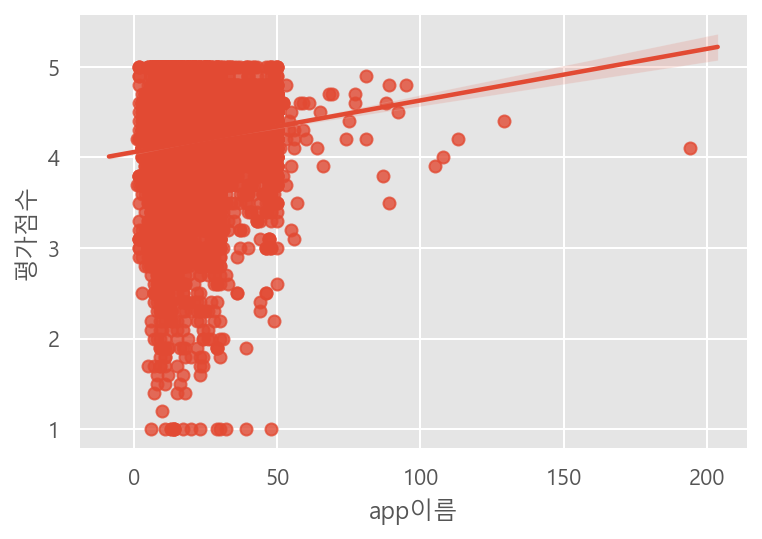

In [136]:
sns.regplot(Curious, New_Data['평가점수'])

와 시방 대박.. 앱 이름 길이가 길수록 평가점수 높다고 나온다..?

In [137]:
pd.crosstab(New_Data.이용가능연령구분,New_Data.장르)

장르,Action,Action;Action & Adventure,Adventure,Adventure;Action & Adventure,Adventure;Brain Games,Adventure;Education,Arcade,Arcade;Action & Adventure,Arcade;Pretend Play,Art & Design,...,Tools,Tools;Education,Travel & Local,Travel & Local;Action & Adventure,Trivia,Video Players & Editors,Video Players & Editors;Creativity,Video Players & Editors;Music & Video,Weather,Word
이용가능연령구분,,,,,,,,,,,,,,,,,,,,,
Adults only 18+,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Everyone,94,12,27,2,1,2,139,10,1,52,...,726,1,219,1,24,131,2,1,71,24
Everyone 10+,49,5,8,11,0,0,34,5,0,1,...,0,0,0,0,0,1,0,2,1,1
Mature 17+,52,0,6,0,0,0,2,0,0,0,...,1,0,1,0,0,2,0,0,1,2
Teen,163,0,32,0,0,0,32,0,0,3,...,5,0,5,0,4,24,0,0,2,1
Unrated,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [138]:
Test_Data.head()

,app이름,카테고리,평가점수,리뷰수,app크기,다운로드수,유료구분,가격,이용가능연령구분,장르,버전,안드로이드버전,업데이트_월,업데이트_일,업데이트_연도
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0,Everyone,Art & Design,1.0.0,4.0.3 and up,1,7,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,1,15,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,5000000,Free,0,Everyone,Art & Design,1.2.4,4.0.3 and up,8,1,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000,Free,0,Teen,Art & Design,Varies with device,4.2 and up,6,8,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,100000,Free,0,Everyone,Art & Design;Creativity,1.1,4.4 and up,6,20,2018


In [139]:
Test_Table = New_Data[['장르', '다운로드수', '업데이트_연도','업데이트_월','유료구분']]

In [140]:
Test_1 = pd.crosstab(Test_Table.유료구분,Test_Table.다운로드수)

In [141]:
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame() 

for i in Test_Table.columns:
    data_encoded[i]=label.fit_transform(Test_Table[i])

In [142]:
from scipy.stats import chi2_contingency
import numpy as np

def cramers_V(var1,var2):
    crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
    stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab) # Number of observations
    mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
    return (stat/(obs*mini))

In [143]:
rows= []

for var1 in data_encoded:
    col = []
    for var2 in data_encoded :
        cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
        col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
    rows.append(col)

cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)


In [144]:
df

,장르,다운로드수,업데이트_연도,업데이트_월,유료구분
장르,1.00,0.03,0.02,0.02,0.09
다운로드수,0.03,1.00,0.02,0.01,0.09
업데이트_연도,0.02,0.02,1.00,0.05,0.03
업데이트_월,0.02,0.01,0.05,1.00,0.01
유료구분,0.09,0.09,0.03,0.01,1.00


In [149]:
New_Data

,app이름,카테고리,평가점수,리뷰수,app크기,다운로드수,유료구분,가격,이용가능연령구분,장르,마지막업데이트,버전,안드로이드버전,업데이트_월,업데이트_일,업데이트_연도
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1,7,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,1,15,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8,1,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,6,8,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,6,20,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2662.4,500,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,6,18,2017
10836,Sya9a Maroc - FR,FAMILY,4.5,38,54272.0,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,7,25,2017
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3686.4,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,7,6,2018
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,1024.0,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,1,19,2015


In [151]:
New_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9367 entries, 0 to 10840
Data columns (total 16 columns):
app이름       9367 non-null object
카테고리        9367 non-null object
평가점수        9367 non-null float64
리뷰수         9367 non-null int64
app크기       9367 non-null float64
다운로드수       9367 non-null int64
유료구분        9367 non-null object
가격          9367 non-null object
이용가능연령구분    9367 non-null object
장르          9367 non-null object
마지막업데이트     9367 non-null object
버전          9363 non-null object
안드로이드버전     9365 non-null object
업데이트_월      9367 non-null int64
업데이트_일      9367 non-null int64
업데이트_연도     9367 non-null int64
dtypes: float64(2), int64(5), object(9)
memory usage: 1.5+ MB


In [153]:
EDA = dict(list(New_Data.groupby('이용가능연령구분')))

In [154]:
with open("EDA.pk",'wb') as f:
    pickle.dump(EDA,f)